In [69]:
# SVM and Random Forest
# Team Project

from sklearn_pandas import DataFrameMapper
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from scipy.sparse import csr_matrix
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
emotions_list = [":)", ":(", ":p", ":D", "-_-", ":o"]
import wordcloud
stop_words = []
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6


In [70]:
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if (re.sub(r'[^://@]', '', d.lower())) is not '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions_list:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i], token_7[i],token_8[i]], dtype=object) for i in
         range(len(messages_data))])


In [79]:

def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    y = np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])
    print(y)
    return y


In [80]:
def svm_fit():
    SVM = svm.SVC()
    SVM.fit(trainset, trainlabel)
    predicted_values_svm = SVM.predict(testset)
    print(predicted_values_svm)
    acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)
    print("acurracy_SVM " + str(acurracy_SVM))
    confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm,labels=["ham","spam"] )
    print(confusion_matrix_SVM)
    skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=False)
    plt.show()

In [81]:
if __name__ == "__main__":
    messages = pd.read_csv("spam.csv", encoding='latin-1')
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

    print(messages.head(5))
    messages_labels = messages['v1']
    messages['length'] = messages['v2'].apply(len)
    messages_data = messages['v2']

    token_1 = []
    token_2 = []
    token_3 = []
    token_4 = messages['length']
    token_5 = []
    token_6 = []
    token_7 = []
    token_8 = []
    
    freq = pd.Series(' '.join(messages_data).split()).value_counts()
    stop_words = stopwords.words('english')
    stop_words.extend(freq[-9268:].index)
    
    data = preprocessing_text()
    labels = ['message','f1','f2','f3','f4','f5','f6','f7']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
    X=mapper.fit_transform(df)
    trainset, testset, trainlabel, testlabel = train_test_split(X, messages_labels, test_size=0.33, random_state=42)



     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
['go' 'point' 'crazi' 'avail' 'bugi' 'n' 'great' 'world' 'la' 'e' 'cine'
 'got' 'wat']
['ok' 'lar' 'joke' 'wif' 'u']
['free' 'entri' 'wkli' 'comp' 'win' 'fa' 'cup' 'final' 'tkt' 'st' 'may'
 'text' 'fa' 'receiv' 'entri' 'questionstd' 'txt' 'ratetc' 'appli' 'over']
['u' 'dun' 'say' 'earli' 'hor' 'u' 'c' 'alreadi' 'say']
['nah' 'dont' 'think' 'goe' 'usf' 'live' 'around' 'though']
['freemsg' 'hey' 'darl' 'week' 'word' 'back' 'id' 'like' 'fun' 'still'
 'tb' 'ok' 'xxx' 'std' 'send' 'rcv']
['even' 'brother' 'like' 'speak' 'treat' 'like' 'patent']
['per' 'request' 'mell' 'mell' 'minnaminungint' 'nurungu' 'vettam' 'set'
 'callertun' 'caller' 'pres

 'free' 'txt' 'horo' 'follow' 'ur' 'sign' 'e' 'g' 'horo' 'ari']
['hey' 'compani' 'po' 'mudyadhu']
['life' 'bcoz' 'teach' 'lesson' 'amp' 'conduct' 'exam' 'life' 'first'
 'conduct' 'exam' 'amp' 'teach' 'lesson' 'happi' 'morn']
['dear' 'good' 'morn']
['get' 'walk' 'cross' 'cut' 'road' 'right' 'side' 'ltgt' 'street' 'road'
 'turn' 'first' 'right']
['dear' 'go' 'place']
['sorri' 'batteri' 'die' 'yeah' 'im']
['yesher' 'tv' 'alway' 'avail' 'work' 'place']
['text' 'meet' 'someon' 'sexi' 'today' 'u' 'find' 'date' 'even' 'flirt'
 'u' 'join' 'p' 'repli' 'name' 'age' 'eg' 'sam' 'msg' 'recdthirtyeight'
 'penc']
['print' 'oh' 'ltgt' 'come']
['ill' 'littl' 'closer' 'like' 'bu' 'stop' 'street']
['youwhen' 'wil' 'reach']
['new' 'argument' 'win' 'situat' 'lose' 'person' 'dont' 'argu' 'ur'
 'friend' 'kick' 'amp' 'say' 'im' 'alway' 'correct']
['u' 'secret' 'admir' 'look' 'make' 'contact' 'ufind' 'rreveal' 'think'
 'ur' 'specialcal']
['final' 'laptop' 'case' 'cant']
['pleassssssseeeee' 'tel' 'v' 'avent' 'd

['exhaust' 'train' 'morn' 'much' 'wine' 'sleep' 'well']
['im' 'go' 'buy' 'mum' 'present']
['mind' 'blastin' 'rajnik' 'stop' 'indian' 'oceand']
['u' 'send' 'home' 'first' 'ok' 'lor' 'im' 'readi' 'yet']
['cash' 'yet']
['happi' 'come' 'noon']
['meet' 'lunch' 'la']
['take' 'care' 'n' 'get' 'well' 'soon']
['xclusiveclubsaisai' 'morow' 'special' 'zouk' 'parisfre' 'rose' 'ladi'
 'info']
['meant' 'say' 'cant' 'wait' 'see' 'u' 'get' 'bore']
['neva' 'mind' 'ok']
['fine' 'imma' 'get' 'drink' 'somethin' 'want' 'come' 'find']
['day' 'kick' 'euro' 'u' 'kept' 'date' 'latest' 'news' 'result' 'send'
 'get' 'txt' 'stop']
['valentin' 'game' 'send' 'di' 'msg' 'ur' 'friend' 'answer' 'r' 'someon'
 'realli' 'love' 'u' 'que' 'colour' 'suit' 'bestrpli']
['mani']
['thanx' 'today' 'cer' 'nice' 'catch' 'ave' 'find' 'time' 'often' 'oh'
 'well' 'take' 'care' 'c' 'u' 'soonc']
['call' 'said' 'himthen' 'choos' 'futur']
['happi' 'day' 'know' 'earli' 'wish' 'thought' 'finish' 'uncl' 'st']
['like' 'v' 'leh' 'co' 'tell' '

 'text' 'date' 'servic' 'text' 'vip' 'see' 'could' 'meet']
['go' 'take' 'babe']
['hai' 'come' 'morn' 'ltdecimalgt' 'ill' 'go' 'rto' 'offic' 'repli' 'came'
 'home']
['spoon' 'okay']
['say' 'somebodi' 'name' 'tampa']
['work' 'go' 'min']
['brother']
['sorri' 'guess' 'whenev' 'get' 'hold' 'mayb' 'hour' 'two' 'ill' 'text']
['u' 'find' 'time' 'bu' 'coz' 'need' 'sort' 'stuff']
['dude' 'ive' 'see' 'lotta' 'late']
['congratul' 'ur' 'award' 'either' 'yr' 'suppli' 'cd' 'record' 'mysteri'
 'gift' 'guarante' 'call' 'tsc' 'wwwsmsconet' 'pm' 'approx' 'min']
['wall' 'shit' 'import' 'never' 'play' 'guess' 'place' 'high' 'enough'
 'dont' 'matter']
['privat' 'account' 'statement' 'xxxxxx' 'show' 'unredeem' 'point' 'call'
 'identifi' 'code' 'expir']
['hello' 'need' 'bird' 'user' 'champney' 'put' 'need' 'address' 'ta' 'r']
['u' 'want' 'xma' 'free' 'text' 'messag' 'new' 'video' 'phone' 'half'
 'price' 'line' 'rental' 'call' 'free' 'find']
['well' 'offici' 'hole' 'u' 'wanna' 'call' 'home' 'readi' 'save']
['g

['lol' 'forgot' 'eh' 'ye' 'ill' 'bring' 'babe']
['good' 'well' 'find' 'way']
['use' 'foreign' 'stamp' 'countri' 'good' 'lectur']
['yup' 'bath' 'liao']
['happi' 'new' 'year' 'man']
['oh' 'mr' 'wanna' 'play' 'game' 'okay' 'your' 'boss' 'im' 'nanni' 'give'
 'rais' 'ill' 'give' 'one']
['zoe' 'hit' 'im' 'fuck' 'shitin' 'il' 'defo' 'tri' 'hardest' 'cum'
 'morow' 'luv' 'u' 'million' 'lekdog']
['hello' 'babi' 'get' 'back' 'set' 'comput' 'belli' 'goe' 'loverboy'
 'miss' 'alreadi' 'sigh']
[]
['naughti' 'littl' 'thought' 'better' 'flirt' 'flirt' 'n' 'flirt' 'rather'
 'love' 'someon' 'n' 'gettin' 'hurt' 'hurt' 'n' 'hurt' 'gud' 'nyt']
['edison' 'rightli' 'said' 'fool' 'ask' 'question' 'wise' 'man' 'answer'
 'know' 'us' 'speechless' 'viva' 'gm']
['talk' 'that' 'de' 'wont']
['today' 'go' 'colleg' 'abl' 'class']
['im' 'class' 'holla' 'later']
['easi' 'ahsen' 'got' 'select' 'mean' 'good']
['mmm' 'that' 'better' 'got' 'roast' 'id' 'b' 'better' 'drink' 'good'
 'indian']
['know' 'someon' 'know' 'fanci' 'c

 'long' 'repli' 'thk' 'toot' 'b' 'b' 'wat' 'shall' 'eat']
['say' 'fantast' 'chanc' 'anyth' 'need' 'bigger' 'life' 'lift' 'lose'
 'live' 'think' 'would' 'first' 'person' 'die' 'n' 'v' 'q']
['nw' 'came' 'da']
['im' 'outsid' 'island' 'head' 'toward' 'hard' 'rock' 'youll' 'run']
['day' 'class' 'class']
['im' 'chennai' 'velacheri']
['shit' 'yet']
['k' 'give' 'sec' 'ltgt']
['much' 'bad' 'avoid' 'like']
['yo' 'around' 'got' 'car' 'back']
['isnt']
['goodmorn' 'today' 'late' 'ltgt' 'min']
['there' 'point' 'mr' 'right' 'he' 'makin' 'u' 'happi']
['come' 'alivebett' 'correct' 'good' 'look' 'figur']
['case' 'guess' 'ill' 'see' 'campu']
['done']
['come' 'home' 'one' 'last' 'time' 'wont' 'anyth' 'trust']
['night' 'appt' 'shame' 'miss' 'girl' 'night' 'hair']
['sex' 'ur' 'mobil' 'free' 'sexi' 'pic' 'jordan' 'text' 'babe' 'everi'
 'wk' 'get' 'sexi' 'celeb' 'pocketbabecouk' 'pic' 'wk']
['ok' 'c' 'ya']
['new' 'voicemail' 'pleas' 'call']
['said' 'matter' 'mind' 'say' 'matter']
['also' 'know' 'lunch' 'menu'

['hey' 'gal' 'anyon' 'u' 'go' 'e' 'drive' 'centr' 'tmr']
['im' 'alway' 'yahoo' 'messeng' 'send' 'messag' 'ill' 'get' 'may' 'send'
 'mobil' 'mode' 'sha' 'ill' 'get' 'repli']
['im' 'put' 'readi' 'lttimegt']
['time' 'n' 'smile' 'r' 'two' 'thing' 'life' 'sometim' 'time' 'make' 'us'
 'forget' 'smile' 'sometim' 'someon' 'smile' 'make' 'us' 'forget' 'time'
 'gud' 'noon']
['sm' 'ac' 'jsco' 'high' 'u' 'may' 'know' 'channel' 'day' 'ur' 'r'
 'strong' 'psychic' 'repli' 'an' 'wquestion' 'end' 'repli' 'end' 'jsco']
['hostbas' 'idp' 'system']
['hot' 'live' 'fantasi' 'call' 'p' 'per' 'min' 'ntt' 'ltd' 'po' 'box'
 'croydon' 'wb' 'nation' 'rate' 'call']
['dawhat' 'plan']
['ill' 'ltgt' 'ok']
['oh' 'god' 'im' 'almost' 'home']
['video' 'free' 'download' 'type' 'googl' 'search']
['thank' 'vote' 'sing' 'along' 'star' 'karaok' 'mobil' 'free' 'link'
 'repli' 'sing']
['wen' 'ur' 'lovabl' 'bcum' 'angri' 'wid' 'u' 'dnt' 'take' 'serious' 'coz'
 'angri' 'childish' 'n' 'true' 'way' 'show' 'deep' 'affect' 'care' 'n'


 'top' 'dat' 'like' 'din' 'buy' 'r']
['wish' 'famili' 'x' 'ma' 'happi' 'new' 'year' 'advanc']
['go' 'ok' 'na']
['ye' 'post' 'coupl' 'pic' 'fb' 'there' 'still' 'snow' 'outsid' 'im'
 'wake']
['sif' 'one' 'good' 'partnership' 'go' 'take' 'lead']
['rgent' 'nd' 'attempt' 'contact' 'uu' 'call' 'b' 'tcsbcmwcnxx' 'callcost'
 'ppm' 'mobilesvari' 'max']
['yeah' 'where' 'class']
['send' 'templ' 'na']
['arent' 'come' 'home' 'class' 'right' 'need' 'work' 'shower']
['hi' 'ur' 'lookin' 'sauci' 'fun' 'wiv' 'marri' 'woman' 'free' 'next'
 'week' 'chat' 'sort' 'time' 'janinexx' 'callsminmobsmorelkpoboxhpfl']
['like']
['v' 'fan']
['dunno' 'co' 'v' 'late' 'n' 'reach' 'insid' 'alreadi' 'ate' 'lor' 'e'
 'gal' 'r' 'laugh' 'lor']
['guess' 'spent' 'last' 'night']
['dad' 'gonna' 'call' 'get' 'work' 'ask' 'crazi' 'question']
['yesbut' 'said']
['hurt' 'n' 'line' 'ever' 'everyth' 'love']
['lmaonic']
['glad' 'see' 'repli']
['urgent' 'tri' 'contact' 'u' 'today' 'draw' 'show' 'prize' 'guarante'
 'call' 'land' 'line' '

['ill' 'probabl' 'tomorrow' 'even' 'later' 'tonight' 'someth' 'go']
['couldnt' 'say' 'man' 'feel' 'sad' 'go' 'want' 'know' 'would' 'probabl'
 'gone' 'late' 'night']
['your' 'think' 'one']
['u' 'dun' 'wan' 'u' 'dun' 'like' 'alreadi' 'wat' 'u' 'still' 'eat']
['sent' 'ur' 'email' 'id' 'soon']
['wat' 'make' 'peopl' 'dearer' 'de' 'happi' 'dat' 'u' 'feel' 'u' 'meet'
 'de' 'pain' 'u' 'feel' 'u' 'miss' 'dem']
['dude' 'what' 'teresa' 'hope' 'okay' 'didnt' 'hear' 'peopl' 'call'
 'receiv' 'packag' 'sinc' 'ltgt' 'thot' 'yould' 'like' 'know' 'fantast'
 'year' 'best' 'read' 'plu' 'realli' 'realli' 'bam' 'first' 'usml' 'work'
 'done']
['hey' 'gorgeou' 'man' 'work' 'mobil' 'number' 'good' 'one' 'babe'
 'squishi' 'mwah']
['may' 'call' 'later' 'pl']
['hottest' 'pic' 'straight' 'phone' 'see' 'get' 'wet' 'want' 'xx' 'text'
 'pic' 'txt' 'cost' 'p' 'textoper' 'gga' 'xxx']
['that' 'way' 'stay' 'oh']
['hello' 'thanx' 'take' 'call' 'got' 'job' 'start' 'monday']
['time' 'ur' 'tmr']
['come']
['rather' 'bite' 'ma

['guarante' 'cash' 'prize' 'claim' 'yr' 'prize' 'call' 'custom' 'servic'
 'repres' 'ampm' 'cost' 'p']
['realli' 'quit' 'funni' 'lor' 'wat' 'u' 'shd' 'haf' 'run' 'shorter'
 'distanc' 'wat']
['notic' 'like' 'look' 'shit' 'your' 'turn' 'right' 'freak']
['great' 'get' 'worri' 'know' 'wonder' 'care' 'person' 'like' 'best'
 'life' 'know' 'u' 'r' 'wonder' 'god' 'love']
['thank' 'rington' 'order' 'ref' 'number' 'k' 'mobil' 'charg' 'tone'
 'arriv' 'pleas' 'call' 'custom' 'servic']
['prefer' 'free' 'day' 'wed' 'fri' 'oso' 'ask' 'workin' 'lor']
['alrit' 'how' 'goin' 'keri' 'bin' 'doin' 'smidgin' 'n' 'e' 'way' 'u'
 'wanna' 'cum' 'collegexx']
['beliv' 'come' 'home']
['oh' 'kkwhere' 'take' 'test']
['exact']
['haha' 'money' 'leh' 'later' 'got' 'go' 'tuition' 'haha' 'look' 'empti'
 'slot' 'drive' 'lesson']
['hey' 'thk' 'juz' 'go' 'wat' 'yest' 'lor' 'except' 'kb' 'sun' 'co'
 'there' 'nt' 'much' 'lesson' 'go' 'attend' 'kb' 'sat']
['k' 'wen' 'ur' 'free' 'come' 'home' 'also' 'tel' 'vikki' 'hav' 'sent'
 'm

 'u' 'first' 'love']
['ok' 'thanx' 'gd' 'nite']
['come' 'right' 'ahmad']
['dont' 'know' 'u' 'u' 'dont' 'know' 'send' 'chat' 'let' 'find' 'pmsg'
 'rcvd' 'hgsuitelandsrowwjhl' 'ldn' 'year']
['lol' 'pleas' 'actual' 'send' 'pic' 'right' 'wanna' 'see' 'pose' 'hair'
 'someth']
[]
['huh' 'mean' 'scienc' 'like' 'dat' 'one' 'push' 'n']
['could' 'read' 'love']
['oh' 'tt' 'den' 'take' 'e' 'one' 'tt' 'end' 'cine' 'lor' 'dun' 'wan'
 'yogasana' 'oso']
['madamregret' 'disturbancemight' 'receiv' 'refer' 'check' 'dlf'
 'premaricakindli' 'informedrgdsrakheshkerala']
['sm' 'servic' 'inclus' 'text' 'credit' 'pl' 'wwwcomuknet' 'login' 'qxj'
 'unsubscrib' 'stop' 'extra' 'charg' 'help' 'comukcm' 'ae']
['oic' 'better' 'quickli' 'go' 'bath' 'n' 'settl']
['err' 'cud' 'im' 'go' 'pm' 'havent' 'got' 'way' 'contact']
['bloo' 'bloo' 'bloo' 'ill' 'miss' 'first' 'bowl']
['fun']
['oh' 'k' 'kbut' 'big' 'hitteranyway' 'good']
['hey' 'almost' 'forgot' 'happi' 'bday' 'babe' 'love' 'ya']
['day' 'special' 'win' 'quiz' 'take'

['case' 'man' 'found' 'murder' 'ltdecimalgt' 'ltgt' 'afternoon' 'wife'
 'call' 'question' 'everyon' 'wife' 'siri' 'sleep' 'murder' 'took' 'place'
 'garden' 'pick' 'veget' 'housemaid' 'went' 'post' 'offic' 'children'
 'went' 'play' 'neighbour' 'went' 'marriag' 'arrest' 'murder' 'immedi'
 'who' 'repli' 'reason' 'u' 'r']
['im' 'da' 'bu' 'go' 'home']
['got' 'call' 'landlin' 'number' 'ask' 'come' 'anna' 'nagar' 'go'
 'afternoon']
['im' 'okay' 'chase' 'dream' 'what' 'good' 'next']
['yupz' 'ive' 'oredi' 'book' 'slot' 'weekend' 'liao']
['urgent' 'tri' 'contact' 'u' 'today' 'draw' 'show' 'prize' 'guarante'
 'call' 'land' 'line' 'claim' 'c' 'valid' 'hr']
['r' 'mani' 'modelsoni' 'also' 'der' 'ltgt' 'good' 'bt' 'forgot']
[]
['ye' 'know' 'song' 'snowman']
['ya' 'ok' 'vikki' 'vl' 'c' 'ltgt' 'min' 'il' 'repli' 'u']
['sport' 'get' 'latest' 'sport' 'news' 'str' 'ur' 'mobil' 'wk' 'free'
 'plu' 'free' 'tone' 'txt' 'sport' 'wwwgetzedcouk' 'norm' 'txtp']
['hey' 'tmr' 'meet' 'bugi']
['urgent' 'urgent' 'free

['knowthi' 'week' 'im' 'go' 'da']
['babi' 'promis' 'treat' 'well' 'bet' 'take' 'good' 'care']
['like' 'hotel' 'game' 'think' 'area' 'thing']
['thank' 'rington' 'order' 'refer' 'number' 'x' 'mobil' 'charg' 'tone'
 'arriv' 'pleas' 'call' 'custom' 'servic']
['hi' 'love' 'goe' 'day' 'fuck' 'morn' 'woke' 'drop' 'cell' 'way' 'seem'
 'alright' 'phew' 'miss']
['well' 'must' 'pain' 'catch']
['sorri' 'da' 'thangamit' 'mistak']
['need' 'coz' 'never' 'go']
['rose' 'redr' 'bloodblood' 'heartheart' 'u' 'u' 'send' 'ti' 'ur' 'friend'
 'includ' 'u' 'like' 'u' 'get' 'back' 'u' 'r' 'poor' 'u' 'need' 'support'
 'u' 'r' 'frnd' 'mani' 'luv' 'u' 'pray' 'god' 'marri' 'u' 'tri']
['wifehow' 'knew' 'time' 'murder' 'exactli']
['six' 'chanc' 'win' 'cash' 'pound' 'txt' 'csh' 'send' 'cost' 'pday' 'day'
 'tsandc' 'appli' 'repli' 'hl' 'info']
['ur' 'cashbal' 'current' 'pound' 'maxim' 'ur' 'cashin' 'send' 'collect'
 'pmsg' 'cc' 'po' 'box' 'tcrw']
['feel' 'like' 'keep' 'sleep' 'text' 'facebook' 'messag' 'sup' 'town']
['

['get' 'back' 'time' 'soon']
['how' 'thing' 'quick' 'question']
['night' 'end' 'anoth' 'day' 'morn' 'come' 'special' 'way' 'may' 'smile'
 'like' 'sunni' 'ray' 'leav' 'worri' 'blue' 'blue' 'bay' 'gud' 'mrng']
['probabl' 'come' 'everybodi' 'done' 'around' 'ltgt' 'right']
['got' 'new' 'year' 'co' 'said' 'want' 'surpris' 'didnt' 'see' 'money'
 'return' 'mid' 'januari' 'ltgt' 'day' 'return' 'period' 'end']
['ask' 'around' 'there' 'lot' 'term' 'mid']
['sure' 'check' 'yahoo' 'email' 'sent' 'photo' 'yesterday']
['look']
['wherr' 'boytoy']
['want' 'new' 'video' 'phone' 'anytim' 'network' 'min' 'text' 'five'
 'pound' 'per' 'week' 'call' 'repli' 'deliveri' 'tomorrow']
['hello' 'love' 'goe' 'day' 'wish' 'well' 'fine' 'babe' 'hope' 'find'
 'job' 'prospect' 'miss' 'boytoy' 'teas' 'kiss']
['tell' 'bad' 'charact' 'u' 'dnt' 'lik' 'ill' 'tri' 'chang' 'ltgt' 'add'
 'tat' 'new' 'year' 'resolut' 'wait' 'ur' 'replyb' 'frankgood' 'morn']
['noi' 'got' 'rumour' 'go' 'buy' 'apart' 'chennai']
['yeah' 'probabl' '

['im' 'gonna' 'uteru']
['cool' 'like' 'pool' 'hous']
['thank' 'rington' 'order' 'refer' 'number' 'x' 'mobil' 'charg' 'tone'
 'arriv' 'pleas' 'call' 'custom' 'servic' 'colourredtextcolourtxtstar']
['yeah' 'gang' 'readi']
['wat' 'lol']
['im' 'movi' 'collect' 'car' 'oredi']
['left' 'alreadi' 'orchard']
['hi' 'ur' 'lucki' 'night' 'uve' 'invit' 'xchat' 'uk' 'chat' 'txt' 'chat'
 'pmsgrcvdhgsuitelandsrowwjhl' 'ldn' 'yr']
['noth' 'splwat' 'abt' 'u' 'ru']
['chikku' 'nt' 'yet' 'ya' 'im' 'free']
['aldrin' 'ex' 'rtm' 'herepl' 'callurg']
['search' 'happi' 'main' 'unhappi' 'accept' 'life' 'way' 'come' 'u' 'find'
 'happi' 'everi' 'moment' 'u' 'live']
['im' 'home' 'pleas' 'call']
['guess' 'could' 'good' 'excus' 'lol']
['isnt' 'frnd' 'life' 'imagin' 'urself' 'frnd' 'hwd' 'u' 'feel' 'ur'
 'colleg' 'watll' 'u' 'ur' 'cell' 'wat' 'abt' 'function' 'thnk' 'abt'
 'espel' 'miss' 'amp' 'u' 'wrd' 'dearlov' 'frnd' 'u' 'cant' 'live' 'jst'
 'takecar' 'goodmorn']
['gud' 'mrng' 'dear' 'hav' 'nice' 'day']
['old' 'orch

['got' 'ltgt']
['good' 'dont' 'need' 'receiptswel' 'done' 'ye' 'pleas' 'tell' 'what'
 'number' 'could' 'ring']
['ever' 'green' 'quot' 'ever' 'told' 'jerri' 'cartoon' 'person' 'irrit'
 'u' 'alway' 'one' 'love' 'u' 'vri' 'much' 'fail' 'gud' 'nyt']
['leav' 'wif' 'lar' 'wan' 'carri' 'heavi' 'da' 'num']
['beauti' 'truth' 'express' 'face' 'could' 'seen' 'everyon' 'heart'
 'could' 'understood' 'love' 'one' 'gud' 'ni']
['infact' 'happi' 'new' 'year' 'see']
['simpson' 'movi' 'releas' 'juli' 'name' 'die' 'start' 'film' 'agreen'
 'day' 'bblue' 'day' 'cred' 'day' 'send' 'b' 'c']
['that' 'shame' 'mayb' 'cld' 'meet' 'hr' 'tomo']
['lol' 'would' 'despit' 'cramp' 'like' 'girl']
['cant' 'wait' 'cornwal' 'hope' 'tonight' 'isnt' 'bad' 'well' 'rock'
 'night' 'shite' 'anyway' 'im' 'go' 'good' 'night' 'speak' 'soon']
['pl' 'help' 'tell' 'sura' 'im' 'expect' 'batteri' 'hont' 'pl' 'send'
 'messag' 'download' 'movi' 'thank']
['pleas' 'call' 'amanda' 'current' 'tmobil' 'free' 'charg' 'offer' 'end'
 'today' 'tel'

['hey' 'mr' 'go' 'sea' 'coupl' 'mean' 'game' 'give' 'bell' 'ya' 'finish']
['k' 'jason' 'say' 'he' 'gonna' 'around' 'ill' 'around' 'ltgt']
['sorri' 'abl' 'get' 'see' 'morn']
['aight' 'well' 'keep' 'inform']
['number' 'sir']
['search' 'good' 'sim' 'mobil' 'pa']
['seem' 'unnecessarili']
['dude' 'got' 'haircut']
['mobil' 'g' 'videophon' 'r' 'call' 'videochat' 'wid' 'ur' 'mate' 'play'
 'java' 'game' 'dload' 'polyh' 'music' 'nolin' 'rentl' 'bx' 'pm']
['appledayno' 'doctor' 'tulsi' 'leafdayno' 'lemondayno' 'fat' 'cup'
 'milkdayno' 'problm' 'litr' 'watrdayno' 'diseas' 'snd' 'th' 'u' 'care']
['thought' 'king' 'thing']
['nope' 'ill' 'come' 'onlin']
['also' 'tell' 'said' 'happi' 'birthday']
['bishan' 'lei' 'tot' 'say' 'lavend']
['boo' 'time' 'u' 'get' 'u' 'suppos' 'take' 'shop' 'today']
['u' 'sound' 'like' 'boy' 'stevelik' 'da' 'bu' 'homewot' 'u' 'di' 'eve']
['fyi' 'im' 'take' 'quick' 'shower' 'epsilon' 'like' 'ltgt' 'min']
['night' 'r' 'u' 'real']
['ye' 'appt']
['got' 'outta' 'class' 'gonna' 'go

['noooooooo' 'pleas' 'last' 'thing' 'need' 'life']
['u' 'secret' 'admir' 'look' 'make' 'contact' 'ufind' 'rreveal' 'think'
 'ur' 'specialcal' 'stopsmsppm']
['mila' 'age' 'blond' 'new' 'look' 'sex' 'guy' 'u' 'like' 'fun' 'text'
 'mtalk' 'pptxt' 'st' 'free' 'increment' 'help']
['ill' 'see' 'swing' 'bit' 'got' 'thing' 'take' 'care']
['want' 'wish' 'happi' 'new' 'year' 'want' 'talk' 'legal' 'advic' 'gari'
 'person' 'ill' 'make' 'trip' 'ptbo' 'hope' 'everyth' 'good' 'babe' 'love'
 'ya']
['finish' 'work' 'yet' 'someth']
['tomorrow' 'go' 'theatr' 'come' 'wherev' 'u' 'call' 'tell' 'come'
 'tomorrow']
['well' 'done' 'england' 'get' 'offici' 'poli' 'rington' 'colour' 'flag'
 'yer' 'mobil' 'text' 'tone' 'flag' 'txt' 'eng' 'stop' 'box' 'wwx']
['right' 'phone' 'someon' 'number' 'like']
['ok' 'wun' 'b' 'angri' 'msg' 'u' 'aft' 'come' 'home' 'tonight']
['good' 'time' 'nice' 'someth' 'bit' 'differ' 'weekend' 'chang' 'see' 'ya'
 'soon']
['yo' 'sorri' 'shower' 'sup']
['carlo' 'pick' 'ill' 'swing' 'usf' '

 'experiencehttpwwwvouchmecometlpdiningasp']
['peopl' 'game' 'im' 'iouri']
['urgent' 'tri' 'contact' 'u' 'today' 'draw' 'show' 'prize' 'guarante'
 'call' 'land' 'line' 'claim' 'valid' 'hr']
['unicef' 'asian' 'tsunami' 'support' 'text' 'ad' 'next' 'bill']
['futur' 'plan' 'tomorrow' 'result' 'today' 'best' 'present' 'enjoy'
 'futur']
['want' 'go' 'morow' 'wil' 'got' 'dear' 'didnt' 'say' 'time']
['suppos' 'meet' 'discuss' 'abt' 'trip' 'thought' 'told' 'afternoon'
 'thought' 'go' 'lesson']
['hey' 'come' 'onlin' 'use' 'msn']
['im' 'fine' 'hope' 'good' 'take' 'care']
['oop' 'shower' 'u' 'call' 'hey' 'park' 'garag' 'univers' 'hospit' 'see'
 'im' 'crazi' 'stuff' 'like' 'happen']
['aiyo' 'u' 'poor' 'thing' 'u' 'dun' 'wan' 'eat' 'u' 'bath' 'alreadi']
['yar' 'tot' 'u' 'knew' 'di' 'would' 'happen' 'long' 'ago' 'alreadi']
['gorgeou' 'keep' 'pix' 'thank']
['boy' 'late' 'home' 'father' 'power' 'frndship']
['jade' 'paul' 'didnt' 'u' 'txt' 'u' 'rememb' 'barm' 'want' 'talk' 'u'
 'txt']
['spend' 'new' 'y

 'got' 'photo' 'great']
['hiwhat' 'think' 'match']
['know' 'thinkin' 'malaria' 'relax' 'children' 'cant' 'handl' 'malaria'
 'would' 'wors' 'gastroenter' 'take' 'enough' 'replac' 'loss' 'temp'
 'reduc' 'give' 'malaria' 'med' 'vomit' 'self' 'limit' 'ill' 'mean' 'day'
 'complet' 'stop']
['dai' 'download' 'exe' 'file' 'run' 'exe']
['yesterday' 'true' 'true']
['kkhow' 'busi']
['pa' 'select']
['natalja' 'f' 'invit' 'friend' 'repli' 'ye' 'see' 'wwwsmsacunat' 'stop'
 'send' 'stop' 'frnd']
['keep' 'ten' 'rs' 'shelf' 'buy' 'two' 'egg']
['late']
['well' 'that' 'nice' 'bad' 'cant' 'eat']
['accident' 'brought' 'em' 'home' 'box']
['pl' 'need' 'dat' 'slowli' 'vomit']
['take' 'exam' 'march']
['jane' 'babe' 'goin' 'wrk' 'feel' 'ill' 'nite' 'fone' 'alreadi' 'cover'
 'chuck']
['nightsw' 'nt' 'stay' 'step' 'liaotoo' 'ex']
['die' 'want' 'u' 'stuff']
['oh' 'fuck' 'juswok' 'bed' 'boatin' 'dock' 'slept' 'wid' 'year' 'old'
 'spinout' 'u' 'da' 'lr' 'xxx']
['smile' 'pleasur' 'smile' 'pain' 'smile' 'troubl' 'pour

['make' 'time' 'tonight' 'whenev' 'cool' 'text' 'whenev' 'your' 'around']
['pay']
['thanx' 'lot' 'ur' 'help']
['your' 'gonna' 'way' 'specif']
['jesu' 'armand' 'realli' 'tri' 'tell' 'everybodi' 'find']
['im' 'wif' 'buy' 'lar']
['mode' 'men' 'left']
['slow' 'use' 'biola']
['later' 'xxx']
['hey' 'ive' 'book' 'lesson' 'sun' 'liao']
['thank' 'gener' 'date']
['way' 'make' 'sure' 'u' 'get' 'train' 'street' 'fun' 'night' 'x']
['thought' 'id' 'get' 'watch' 'co' 'that' 'kind' 'thing' 'u' 'getanth'
 'love' 'much']
['guarante' 'award' 'mayb' 'even' 'cash' 'claim' 'ur' 'award' 'call'
 'free' 'number' 'wat' 'u' 'think']
['good' 'morn' 'repair' 'shopth' 'reason' 'im' 'hour']
['that' 'fine' 'got' 'enough' 'bud' 'last' 'night' 'least']
['back' 'good' 'let' 'know' 'need' 'receipt' 'shall' 'tell' 'like'
 'pendent']
['take' 'away' 'money' 'worri']
['aight' 'pick' 'open' 'tonight']
['latest' 'news' 'station' 'stolen' 'noth' 'go']
['sac' 'need' 'carri']
['sing' 'hu' 'think' 'also' 'import' 'find' 'someon' '

['sir' 'wait' 'mail']
['thought' 'nver' 'get' 'tire' 'littl' 'thing' 'lovabl' 'person'
 'cozsomtim' 'littl' 'thing' 'occupi' 'biggest' 'part' 'heart' 'gud' 'ni']
['know' 'pl' 'open' 'back']
['ye' 'see' 'ya']
['what' 'name' 'take' 'class' 'us']
['freemsg' 'havent' 'repli' 'text' 'im' 'randi' 'sexi' 'femal' 'live'
 'local' 'luv' 'hear' 'u' 'netcollex' 'ltd' 'p' 'per' 'msg' 'repli' 'stop'
 'end']
['ummmawil' 'call' 'check' 'inour' 'life' 'begin' 'qatar' 'pl' 'pray'
 'hard']
['delet' 'contact']
['sindu' 'got' 'job' 'birla' 'soft']
['wine' 'flow' 'im' 'never']
['yup' 'thk' 'cine' 'better' 'co' 'need' 'go' 'plaza' 'mah']
['ok' 'ur' 'repli']
['per' 'request' 'mell' 'mell' 'minnaminungint' 'nurungu' 'vettam' 'set'
 'callertun' 'caller' 'press' 'copi' 'friend' 'callertun']
['dirt' 'floor' 'even' 'shirt' 'sometim' 'open' 'come' 'flow' 'dream'
 'world' 'without' 'half' 'time' 'joy' 'lot' 'tv' 'show' 'ill' 'see'
 'guess' 'like' 'thing' 'must' 'exist' 'like' 'rain' 'mist' 'time' 'done'
 'becom' 'on

 'eca' 'pmsgp']
['nice' 'line' 'said' 'broken' 'heart' 'plz' 'dont' 'cum' 'time' 'infront'
 'wise' 'trust' 'u' 'good']
['ok' 'im' 'gonna' 'head' 'usf' 'like' 'fifteen' 'minut']
['love' 'aathilov' 'u' 'lot']
['tension' 'ahwhat' 'machiani' 'problem']
['k' 'pick' 'anoth' 'th' 'your' 'done']
['whenr' 'guy' 'get' 'back' 'g' 'said' 'think' 'stay']
['almost' 'see' 'u' 'sec']
['yo' 'carlo' 'friend' 'alreadi' 'ask' 'work' 'weekend']
['watch' 'tv' 'lor']
['thank' 'babi' 'cant' 'wait' 'tast' 'real' 'thing']
['chang' 'fb']
['win' 'realli' 'side' 'long' 'time']
['free' 'messag' 'activ' 'free' 'text' 'messag' 'repli' 'messag' 'word'
 'free' 'term' 'condit' 'visit' 'wwwcom']
['dear' 'reach' 'railway' 'happen']
['depend' 'qualiti' 'want' 'type' 'sent' 'glori' 'want' 'mayb']
['think' 'ive' 'fix' 'send' 'test' 'messag']
['sorri' 'man' 'account' 'dri' 'would' 'want' 'could' 'trade' 'back'
 'half' 'could' 'buy' 'shit' 'credit' 'card']
['year' 'special' 'cinema' 'pass' 'call' 'c' 'suprman' 'v' 'matrix'
 's

['sure' 'result' 'offer']
['good' 'morn' 'dear' 'great' 'amp' 'success' 'day']
['want' 'anytim' 'network' 'min' 'text' 'new' 'video' 'phone' 'five'
 'pound' 'per' 'week' 'call' 'repli' 'deliveri' 'tomorrow']
['sir' 'late' 'pay' 'rent' 'past' 'month' 'pay' 'ltgt' 'charg' 'felt'
 'would' 'inconsider' 'nag' 'someth' 'give' 'great' 'cost' 'that' 'didnt'
 'speak' 'howev' 'recess' 'wont' 'abl' 'pay' 'charg' 'month' 'henc'
 'askin' 'well' 'ahead' 'month' 'end' 'pleas' 'help' 'thank']
['tri' 'contact' 'offer' 'new' 'video' 'phone' 'anytim' 'network' 'min'
 'half' 'price' 'rental' 'camcord' 'call' 'repli' 'deliveri' 'wed']
['last' 'chanc' 'claim' 'ur' 'worth' 'discount' 'voucherstext' 'ye'
 'nowsavamobmemb' 'offer' 'mobil' 'cs' 'remov' 'txt' 'x' 'stop']
['luv' 'u' 'much' 'u' 'dont' 'understand' 'special' 'u' 'r' 'ring' 'u'
 'morrow' 'luv' 'u' 'xxx']
['pl' 'send' 'mail' 'im' 'pay' 'much']
['prashanthettan' 'mother' 'pass' 'away' 'last' 'night' 'pray' 'famili']
['urgent' 'call' 'landlin' 'complim

 'fullonsmscom']
['oha' 'usual' 'vijay' 'film' 'differ']
['dont' 'know' 'u' 'u' 'dont' 'know' 'send' 'chat' 'let' 'find' 'pmsg'
 'rcvd' 'hgsuitelandsrowwjhl' 'ldn' 'year']
['good' 'day' 'mine' 'realli' 'busi' 'much' 'tomorrow' 'night']
['way' 'send' 'shade' 'stuff' 'wonder']
['realli' 'tot' 'ur' 'paper' 'end' 'long' 'ago' 'wat' 'u' 'ju' 'got' 'use'
 'u' 'happi' 'lar' 'still' 'haf' 'studi']
['thank' 'winner' 'sm' 'good' 'luck' 'futur' 'repli' 'stop' 'custom'
 'servic']
['babe' 'lost']
['ok' 'help' 'ask' 'work' 'tmr']
['im' 'drive' 'rain' 'ill' 'get' 'caught' 'e' 'mrt' 'station' 'lor']
['drop']
['said' 'text' 'one' 'time']
['sorri' 'ill' 'call' 'later']
['ok' 'go' 'chang' 'also']
['girl' 'mani' 'local' 'u' 'r' 'r' 'readi' 'fil' 'ur' 'everi' 'need' 'u'
 'fil' 'text' 'cute' 'p']
['u' 'find' 'kaitlyn' 'sick' 'slept' 'day' 'yesterday']
['sorri' 'man' 'accident' 'left' 'phone' 'silent' 'last' 'night' 'didnt'
 'check' 'til' 'got']
['hey' 'someth' 'came' 'last' 'min' 'think' 'wun' 'tmr']
['he' 

['make' 'girl' 'happi' 'difficult' 'make' 'girl' 'happi' 'u' 'need'
 'friend' 'companion' 'lover' 'chef' 'ltgt' 'good' 'ltgt' 'organ' 'ltgt'
 'good' 'ltgt' 'clean' 'ltgt' 'sympathet' 'ltgt' 'athlet' 'ltgt' 'warm'
 'ltgt' 'courag' 'ltgt' 'determin' 'ltgt' 'true' 'ltgt' 'depend' 'ltgt'
 'ltgt' 'psychologist' 'ltgt' 'pest' 'ltgt' 'psychiatrist' 'ltgt' 'healer'
 'ltgt' 'stylist' 'ltgt' 'driver' 'aaniy' 'venaam']
['princess' 'bet' 'chase']
['shall' 'book' 'half' 'that' 'ok']
['hhahhaahahah' 'wtf' 'room' 'someth']
['yep' 'derek' 'hous' 'see' 'sunday']
['cool' 'let' 'know' 'kick' 'around' 'ltgt' 'ill' 'day']
['sorri' 'ill' 'call' 'later']
['wonder' 'would' 'okay' 'call' 'uncl' 'john' 'let' 'know' 'thing'
 'nigeria' 'r' 'ltgt' 'dollar' 'year' 'sent' 'know' 'plan' 'pay' 'back'
 'everi' 'dime' 'give' 'everi' 'dime' 'expect' 'anyth' 'someth' 'like']
['charg' 'transfer' 'charg' 'like']
['dont' 'search' 'love' 'let' 'love' 'find' 'u' 'that' 'call' 'fall'
 'love' 'bcoz' 'u' 'dont' 'forc' 'u' 'fall' 

 'knew' 'u' 'felt' 'iwasmarinethat' 'itriedtel' 'urmomi' 'u']
['win' 'winner' 'mr' 'foley' 'ipod' 'excit' 'prize' 'soon' 'keep' 'eye'
 'ur' 'mobil' 'visit' 'wwwwincouk']
['bad' 'girl' 'still' 'rememb']
['much' 'gave' 'morn']
['hope' 'alright' 'babe' 'worri' 'might' 'felt' 'bit' 'despar' 'job'
 'wait' 'come' 'back' 'love']
['hey' 'tell' 'blake' 'address' 'carlo' 'want' 'meet' 'got' 'lost' 'he'
 'answer' 'phone']
['get' 'opinion' 'someth' 'first']
['one' 'week' 'leav' 'put' 'know' 'time']
['hit' 'move']
['excel' 'spent' 'ltgt' 'year' 'air' 'forc' 'iraq' 'afghanistan' 'honest'
 'like' 'travel']
['wanna' 'watch' 'movi']
['ok' 'lor' 'thanx' 'school']
['im' 'class' 'get' 'text']
['bu' 'leav' 'ltgt']
['god' 'blessget' 'good' 'sleep' 'deari' 'pray']
['today' 'voda' 'number' 'end' 'select' 'receiv' 'award' 'match' 'pleas'
 'call' 'quot' 'claim' 'code' 'standard' 'rate' 'app']
['nice' 'day' 'today' 'love']
['aiyo' 'bit' 'noe' 'scare' 'dun' 'rem' 'die' 'becom' 'better' 'lookin'
 'oredi' 'leh']
['

['spoke' 'uncl' 'john' 'today' 'feel' 'need' 'keep' 'he' 'go' 'call' 'beg'
 'listen' 'dont' 'make' 'promis' 'make' 'clear' 'thing' 'easi' 'need'
 'pleas' 'let' 'us' 'work' 'thing' 'long' 'keep' 'expect' 'help' 'pl'
 'keep' 'happi' 'promis' 'part']
['start' 'search' 'get' 'job' 'daysh' 'great' 'potenti' 'talent']
['carlo' 'took' 'leav' 'minut']
['well' 'done' 'luv' 'ya']
['came']
['k' 'still' 'love']
['juz' 'rememb' 'gotta' 'bath' 'dog' 'today']
['drug' 'abl' 'eat']
['alright' 'took' 'morphin' 'back' 'yo']
['see' 'pleas']
['stayin' 'troubl' 'strangersaw' 'dave' 'day' 'he' 'sort' 'nowstil' 'u'
 'gona' 'get' 'girl' 'mrur' 'mum' 'still' 'think' 'get' 'getha']
['freemsg' 'hey' 'im' 'buffi' 'love' 'satisfi' 'men' 'home' 'alon' 'feel'
 'randi' 'repli' 'c' 'pix' 'qlynnbv' 'helpp' 'msg' 'send' 'stop' 'stop'
 'txt']
['sunshin' 'hol' 'claim' 'ur' 'med' 'holiday' 'send' 'stamp' 'self'
 'address' 'envelop' 'drink' 'us' 'po' 'box' 'bray' 'wicklow' 'eir' 'quiz'
 'start' 'saturday' 'unsub' 'stop']
['c

['indian' 'r' 'poor' 'poor' 'countri' 'say' 'one' 'swiss' 'bank'
 'director' 'say' 'ltgt' 'indian' 'money' 'swiss' 'bank' 'use' 'taxless'
 'budget' 'ltgt' 'yr' 'give' 'ltgt' 'job' 'indian' 'villag' 'delhi'
 'forev' 'free' 'power' 'ltgt' 'social' 'project' 'everi' 'citizen' 'get'
 'monthli' 'ltgt' 'ltgt' 'yr' 'need' 'world' 'bank' 'amp' 'imf' 'loan'
 'think' 'money' 'rich' 'politician' 'full' 'right' 'politician' 'itna'
 'forward' 'padhegm']
['uncl' 'need' 'movi' 'oh' 'guid' 'plu' 'know' 'legal' 'system' 'gr' 'day'
 'plu' 'start' 'co' 'dont' 'meet' 'onlin' 'honey' 'moon']
['oh' 'ya' 'ya' 'rememb' 'da']
['regard' 'realli' 'tri' 'see' 'anyon' 'els' 'th' 'guy' 'random' 'dude']
['ur' 'chanc' 'win' 'cash' 'everi' 'wk' 'txt' 'play' 'tsc'
 'wwwmusictrivianet' 'custcar' 'xpwk']
['busi' 'juz' 'dun' 'wan' 'go' 'earli']
['rightio' 'well' 'arent' 'bright' 'earli' 'morn']
['great' 'im' 'holla' 'get']
['back' 'brum' 'thank' 'put' 'us' 'keep' 'us' 'happi' 'see' 'soon']
['donno']
['ltgt' 'great' 'loxah

['dont' 'make' 'big' 'deal' 'regular' 'pap']
['art' 'colleg']
['want' 'talk']
['pandi' 'join' 'w' 'todayh' 'got' 'job']
['guarante' 'latest' 'nokia' 'phone' 'gb' 'ipod' 'mp' 'player' 'prize'
 'txt' 'word' 'collect' 'ibhltd' 'ldnwh' 'pmtmsgrcvd']
['tri' 'get' 'lost' 'fact' 'tee']
['hi' 'spoke' 'maneesha' 'v' 'wed' 'like' 'know' 'satisfi' 'repli' 'toll'
 'free' 'ye']
['friend' 'use' 'call']
['sorri' 'ill' 'call' 'later']
['em' 'olowoyey' 'uscedu' 'great' 'time' 'argentina' 'sad' 'everyth'
 'bless']
['massagetiepo' 'ok' 'lool']
['hi' 'pleas' 'get' 'ltgt' 'dollar' 'loan' 'ill' 'pay' 'back' 'mid'
 'februari' 'pl']
['might' 'want' 'pull' 'case' 'plan' 'spend' 'dont' 'much' 'derek'
 'taylor' 'money' 'manag']
['like' 'booti' 'danc' 'floor']
['text' 'get' 'dont' 'call' 'phone' 'problem']
['need' 'drug' 'anymor']
['sorri' 'dai' 'thought' 'call' 'lot' 'timeslil' 'busyi' 'call' 'noon']
['sarcasm' 'nt']
['great' 'run']
['feel' 'like' 'tri' 'kadeem' 'v']
['dai' 'ltgt' 'eruku']
['yet' 'chikkuwat' 'ab

['ok' 'din' 'get' 'ur' 'msg']
['tessypl' 'favor' 'pl' 'convey' 'birthday' 'wish' 'nimyapl' 'dnt'
 'forget' 'today' 'birthday' 'shija']
['pathaya' 'pa']
['even' 'friend' 'call']
['u' 'lousi' 'run' 'alreadi' 'come' 'back' 'half' 'dead']
['that' 'said' 'bad' 'dat' 'e' 'gal' 'know' 'u' 'wat' 'u']
['remind' 'hr']
['hope' 'would' 'send' 'messag' 'rent' 'due' 'dont' 'enough' 'complet'
 'gone' 'loan' 'need' 'hope' 'could' 'balanc' 'ltgt' 'way' 'could' 'get'
 'till' 'mid' 'march' 'hope' 'pay' 'back']
['hi' 'happi' 'new' 'year' 'dont' 'mean' 'pl' 'let' 'know' 'much'
 'tuition' 'paid' 'last' 'semest' 'much' 'semest' 'thank']
['hello' 'ru' 'way' 'im' 'good' 'date' 'guy' 'met' 'far' 'meet' 'soon'
 'how' 'everyon' 'els']
['lol' 'gonna' 'last' 'month' 'left' 'ltgt' 'case' 'collect' 'week' 'caus'
 'blog']
['good' 'luck' 'draw' 'take' 'place' 'th' 'feb' 'good' 'luck' 'remov'
 'send' 'stop' 'custom' 'servic']
['short' 'cute' 'good' 'person']
['havent' 'decid' 'yet' 'eh']
['wat' 'time' 'liao' 'still' 'go

['know' 'girl' 'alway' 'safe' 'know' 'got' 'pa' 'thank' 'good' 'night']
['worri' 'hope' 'photo' 'shoot' 'went' 'well' 'fun' 'workag']
['im' 'freez' 'ice' 'fml']
['kay' 'sinc' 'alreadi']
['eh' 'sorri' 'leh' 'din' 'c' 'ur' 'msg' 'sad' 'alreadi' 'lar' 'watch'
 'tv' 'u' 'still' 'offic']
['yo' 'im' 'right' 'yo' 'work']
['ok' 'darlin' 'ok' 'worri' 'muchi' 'film' 'stuff' 'mate' 'call' 'therexx']
['said' 'u' 'mind' 'go' 'bedroom' 'minut' 'ok' 'sed' 'sexi' 'mood' 'came'
 'minut' 'latr' 'wid' 'caken' 'wife']
['wake' 'sinc' 'check' 'stuff' 'saw' 'true' 'avail' 'space' 'pl' 'call'
 'send' 'mail']
['nope' 'juz' 'work']
['huh' 'fast' 'dat' 'mean' 'u' 'havent' 'finish']
['number' 'u' 'live']
['put' 'parti' 'day' 'week' 'studi' 'lightli' 'think' 'need' 'draw'
 'custom' 'know']
['sac' 'score' 'big' 'hundredh' 'set' 'batsman']
['send' 'yetti' 'number' 'pl']
['much' 'cost' 'approx' 'per' 'month']
['ok' 'test' 'go' 'book' 'think' 'may' 'coz' 'thought' 'wanna' 'go' 'isnt'
 'free']
['contact' 'date' 'servic

 'muchxxlov' 'u' 'locaxx']
['know' 'hook' 'mean' 'right']
['custom' 'servic' 'announc' 'recent' 'tri' 'make' 'deliveri' 'unabl'
 'pleas' 'call' 'reschedul' 'ref']
['wat' 'da' 'model' 'num' 'ur' 'phone']
['he' 'realli' 'despit' 'fact' 'get' 'shit' 'arm' 'everi' 'five' 'minut']
['stop' 'club' 'tone' 'repli' 'stop' 'mix' 'see' 'mytonecomenjoy' 'term'
 'club' 'tone' 'cost' 'gbpweek' 'mfl']
['hous' 'e' 'quit' 'dark' 'liao' 'rain' 'got' 'excus' 'run' 'alreadi'
 'rite']
['sorri' 'left' 'phone' 'ok' 'might' 'would' 'bird' 'one' 'fell' 'date']
['thought' 'didnt' 'see']
['get' 'laidwant' 'real' 'locat' 'sent' 'direct' 'mobil' 'join' 'uk'
 'largest' 'dog' 'network' 'txt' 'nownyt' 'eca' 'lp' 'msg']
['carlo' 'say' 'pick' 'later' 'yeah' 'set']
['hey' 'babe' 'friend' 'cancel' 'still' 'visit']
['per' 'request' 'maangalyam' 'alaipayuth' 'set' 'callertun' 'caller'
 'press' 'copi' 'friend' 'callertun']
['hmm' 'ill' 'think' 'ok' 'your']
['hope' 'get' 'away' 'langport' 'still' 'town' 'tonight']
['want' 'se

 'soon' 'lol']
['god' 'pick' 'flower' 'dippeditinadew' 'lovingli' 'touch'
 'itwhichturnedinto' 'u' 'gift' 'tomeandsaidthi' 'friend' 'u']
['kick' 'new' 'season' 'free' 'news' 'ur' 'mobil' 'txt' 'ur' 'club' 'name'
 'eg' 'villa']
['hey' 'till' 'dint' 'meet' 'even' 'singl' 'time' 'saw' 'situat']
['gam' 'gone' 'outstand']
['play' 'bro' 'ltgt' 'religi']
['sir' 'good' 'morn' 'hope' 'good' 'weekend' 'call' 'let' 'know' 'abl'
 'rais' 'ltgt' 'dad' 'howev' 'said' 'would' 'make' 'rest' 'avail' 'mid'
 'feb' 'amount' 'still' 'quit' 'short' 'hope' 'would' 'help' 'good' 'day'
 'abiola']
['hurri' 'home' 'done']
['check' 'room' 'befor' 'activ']
['good' 'afternoon' 'love' 'good' 'see' 'word' 'ym' 'get' 'tm' 'smart'
 'move' 'slave' 'drink' 'coffe' 'await']
['quit' 'ok' 'bit' 'ex' 'u' 'better' 'go' 'eat' 'smth' 'els' 'ill' 'feel'
 'guilti']
['orang' 'bring' 'rington' 'time' 'hero' 'free' 'hit' 'week' 'go'
 'rington' 'pic' 'stop' 'receiv' 'repli' 'stop']
['lemm' 'know' 'your']
['privat' 'account' 'statement

['come' 'din' 'c' 'yup' 'cut' 'hair']
['k' 'k' 'pa' 'lunch']
['oh' 'ho' 'first' 'time' 'u' 'use' 'type' 'word']
['comedi' 'tvhe' 'drunken']
['cours' 'guess' 'god' 'got' 'hold' 'right']
['keep' 'distanc']
['havent']
['get' 'mobil' 'content' 'wwwclubmobycom' 'call' 'polytruepixringtonesgam'
 'six' 'download']
['sorri' 'din' 'lock' 'keypad']
['u' 'got' 'person' 'stori']
['plan' 'come' 'chennai']
['tri' 'contact' 'repli' 'offer' 'video' 'phone' 'anytim' 'network' 'min'
 'half' 'price' 'line' 'rental' 'camcord' 'repli' 'call']
['god' 'creat' 'gap' 'ur' 'finger' 'dat' 'vri' 'special' 'fill' 'gap'
 'hold' 'ur' 'plz' 'dont' 'ask' 'creat' 'much' 'gap' 'leg']
['okay' 'go' 'sleep' 'later']
['pleas' 'protect' 'ethreat' 'sib' 'never' 'ask' 'sensit' 'inform' 'like'
 'passwordsatmsm' 'pin' 'thru' 'email' 'never' 'share' 'password'
 'anybodi']
['final' 'happen' 'aftr' 'decad' 'cheaper' 'us' 'drink' 'dont' 'drive']
['xma' 'reward' 'wait' 'comput' 'randomli' 'pick' 'loyal' 'mobil' 'custom'
 'receiv' 're

['slept' 'thinkthi' 'time' 'ltgt' 'pm']
['network' 'job']
['invit' 'friend' 'repli' 'ye' 'see' 'wwwsmsacugoldvik' 'stop' 'send'
 'stop' 'frnd']
['dont' 'let' 'studi' 'lr']
['that' 'u' 'haf' 'keep' 'busi']
['rush' 'im' 'work' 'im' 'school' 'rush' 'go' 'hungri']
['channel']
['tell' 'real' 'valentin' 'u' 'never' 'pick' 'noth']
['phoni' 'award' 'today' 'voda' 'number' 'end' 'xxxx' 'select' 'receiv'
 'award' 'match' 'pleas' 'call' 'quot' 'claim' 'code' 'standard' 'rate'
 'app']
['made' 'eta' 'taunton' 'plan' 'hope' 'that' 'still' 'okday' 'good' 'see'
 'xx']
['im' 'hungri' 'buy' 'smth' 'home']
['hey' 'kate']
['drive' 'read' 'need' 'write']
['look' 'addi' 'goe' 'back' 'monday' 'suck']
['happi' 'new' 'year' 'hope' 'good' 'semest']
['lor' 'els']
['talk']
['hmph' 'go' 'head' 'big' 'baller']
['well' 'like' 'actual' 'call' 'someon' 'punto' 'woulda' 'wors']
['nope' 'sinc' 'travel' 'forgotten' 'guy']
['still' 'around' 'look' 'pick' 'later']
['cd' 'u' 'congratul' 'ur' 'award' 'gift' 'voucher' 'gift' 

 'perfum' 'smth' 'dat' 'keep']
['sday' 'joinedso' 'train' 'start' 'today']
['sorri' 'grocer']
['nice' 'near' 'franki' 'n' 'benni' 'near' 'cinema']
['costa' 'sol' 'holiday' 'await' 'collect' 'call' 'toclaim' 'sae' 'tc'
 'pobox' 'stockport' 'skxh' 'costpm' 'maxmin']
['yup' 'havent' 'want' 'go' 'yoga' 'call' 'book']
['oh' 'shut' 'omg' 'yesterday' 'dream' 'kid' 'boy' 'piss' 'kid' 'boy'
 'even' 'told' 'mark' 'dream' 'caus' 'im' 'get' 'face']
['yeah' 'imagin' 'would' 'realli' 'gentl' 'unlik' 'doc' 'treat' 'like'
 'turkey']
['free' 'st' 'week' 'nokia' 'tone' 'ur' 'mobil' 'everi' 'week' 'txt'
 'nokia' 'get' 'txting' 'tell' 'ur' 'mate' 'wwwgetzedcouk' 'pobox' 'wwq'
 'normpton']
['start' 'dont' 'stop' 'pray' 'good' 'anyth' 'see' 'help' 'guy' 'ill'
 'forward' 'link']
['hi' 'darlin' 'im' 'fone' 'im' 'gonna' 'b' 'nite' 'pleas' 'come' 'tb'
 'love' 'kate']
['im' 'offic' 'dawher']
['aiyar' 'u' 'poor' 'thing' 'give' 'u' 'support' 'k' 'jia' 'ill' 'think'
 'u']
['oh' 'bad' 'time' 'great' 'finger' 'train'

In [82]:
print(type(stop_words))

<class 'list'>


In [83]:
print(X.shape)

(5572, 5115)


['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']
acurracy_SVM 0.9581294181620446
[[1582    5]
 [  72  180]]


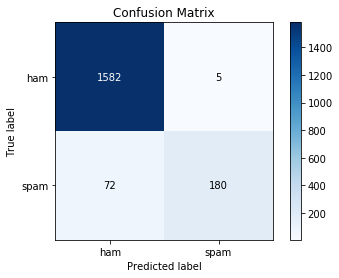

In [76]:
svm_fit()

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']
acurracy_SVM 0.9842305600870038
[[1577   10]
 [  19  233]]


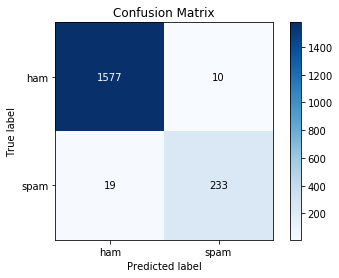

In [84]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(trainset, trainlabel)
predicted_values_svm = clf.predict(testset)
print(predicted_values_svm)
acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)
print("acurracy_SVM " + str(acurracy_SVM))
confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm,labels=["ham","spam"] )
print(confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=False)
plt.show()


In [85]:
mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',TfidfVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
X=mapper.fit_transform(df)
trainset, testset, trainlabel, testlabel = train_test_split(X, messages_labels, test_size=0.33, random_state=42)



['go' 'point' 'crazi' 'avail' 'bugi' 'n' 'great' 'world' 'la' 'e' 'cine'
 'got' 'wat']
['ok' 'lar' 'joke' 'wif' 'u']
['free' 'entri' 'wkli' 'comp' 'win' 'fa' 'cup' 'final' 'tkt' 'st' 'may'
 'text' 'fa' 'receiv' 'entri' 'questionstd' 'txt' 'ratetc' 'appli' 'over']
['u' 'dun' 'say' 'earli' 'hor' 'u' 'c' 'alreadi' 'say']
['nah' 'dont' 'think' 'goe' 'usf' 'live' 'around' 'though']
['freemsg' 'hey' 'darl' 'week' 'word' 'back' 'id' 'like' 'fun' 'still'
 'tb' 'ok' 'xxx' 'std' 'send' 'rcv']
['even' 'brother' 'like' 'speak' 'treat' 'like' 'patent']
['per' 'request' 'mell' 'mell' 'minnaminungint' 'nurungu' 'vettam' 'set'
 'callertun' 'caller' 'press' 'copi' 'friend' 'callertun']
['winner' 'valu' 'network' 'custom' 'select' 'receivea' 'prize' 'reward'
 'claim' 'call' 'claim' 'code' 'kl' 'valid' 'hour']
['mobil' 'month' 'u' 'r' 'entitl' 'updat' 'latest' 'colour' 'mobil'
 'camera' 'free' 'call' 'mobil' 'updat' 'co' 'free']
['im' 'gonna' 'home' 'soon' 'dont' 'want' 'talk' 'stuff' 'anymor'
 'tonight'

 'turn' 'first' 'right']
['dear' 'go' 'place']
['sorri' 'batteri' 'die' 'yeah' 'im']
['yesher' 'tv' 'alway' 'avail' 'work' 'place']
['text' 'meet' 'someon' 'sexi' 'today' 'u' 'find' 'date' 'even' 'flirt'
 'u' 'join' 'p' 'repli' 'name' 'age' 'eg' 'sam' 'msg' 'recdthirtyeight'
 'penc']
['print' 'oh' 'ltgt' 'come']
['ill' 'littl' 'closer' 'like' 'bu' 'stop' 'street']
['youwhen' 'wil' 'reach']
['new' 'argument' 'win' 'situat' 'lose' 'person' 'dont' 'argu' 'ur'
 'friend' 'kick' 'amp' 'say' 'im' 'alway' 'correct']
['u' 'secret' 'admir' 'look' 'make' 'contact' 'ufind' 'rreveal' 'think'
 'ur' 'specialcal']
['final' 'laptop' 'case' 'cant']
['pleassssssseeeee' 'tel' 'v' 'avent' 'done' 'sportsx']
['okay' 'shine' 'meant' 'sound' 'better']
['told' 'u' 'dat' 'im' 'face' 'realli' 'like' 'e' 'watch' 'u' 'gave' 'co'
 'fr' 'u' 'thanx' 'everyth' 'dat' 'uve' 'done' 'today' 'im' 'touch']
['u' 'dont' 'rememb' 'old']
['late' 'said' 'didnt' 'dont' 'slipper']
['ask' 'call' 'ok']
['kalli' 'wont' 'bat' 'nd']
['d

['hey' 'late' 'meet']
['doubl' 'min' 'txt' 'month' 'free' 'bluetooth' 'orang' 'avail' 'soni'
 'nokia' 'motorola' 'phone' 'call' 'mobileupd' 'calloptoutndx']
['took' 'mr' 'lick']
['custom' 'place' 'call']
['mm' 'time' 'dont' 'like' 'fun']
['mth' 'half' 'price' 'orang' 'line' 'rental' 'latest' 'camera' 'phone'
 'free' 'phone' 'mth' 'call' 'mobilesdirect' 'free' 'updat' 'orstoptxt']
['yup' 'lunch' 'u' 'eat' 'alreadi']
['huh' 'late' 'fr' 'dinner']
['hey' 'sat' 'go' 'intro' 'pilat']
['morn' 'ok']
['ye' 'think' 'offic' 'room' 'think' 'that' 'last' 'day' 'didnt' 'shut']
['pick' 'bout' 'time' 'go']
['award' 'everi' 'two' 'monthnot' 'current' 'one' 'month' 'period']
['actual' 'sleep' 'still' 'might' 'u' 'call' 'back' 'text' 'gr' 'rock'
 'si' 'send' 'u' 'text' 'wen' 'wake']
['alway' 'put' 'busi' 'put' 'pictur' 'ass' 'facebook' 'one' 'open' 'peopl'
 'ive' 'ever' 'met' 'would' 'think' 'pictur' 'room' 'would' 'hurt' 'make'
 'feel']
['good' 'even' 'sir' 'al' 'salam' 'wahleykkumshar' 'happi' 'newsbi'

['mani' 'lick' 'take' 'get' 'center']
['yup' 'thk' 'r' 'e' 'said' 'make' 'face' 'look' 'longer' 'darren' 'ask'
 'cut' 'short']
['new' 'textbuddi' 'chat' 'horni' 'guy' 'ur' 'area' 'p' 'free' 'receiv'
 'search' 'postcod' 'gaytextbuddycom' 'txt' 'one' 'name']
['today' 'vodafon' 'number' 'end' 'select' 'receiv' 'award' 'number'
 'match' 'call' 'receiv' 'award']
['pleas' 'dont' 'say' 'like' 'hi' 'hi' 'hi']
['thank' 'u']
['oh' 'forward' 'messag' 'thought' 'send']
['got' 'seventeen' 'pound' 'hope' 'ok']
['dear' 'voucher' 'claim' 'week' 'offer' 'pc' 'go'
 'httpwwwetlpcoukexpressoff' 'tsc' 'appli' 'stop' 'text' 'txt' 'stop']
['n' 'funni']
['sweetheart' 'hope' 'kind' 'day' 'one' 'load' 'reason' 'smile' 'biola']
['login' 'dat' 'time' 'dad' 'home']
['shower' 'babi']
['askd' 'u' 'question' 'hour' 'answer']
['well' 'imma' 'definit' 'need' 'thanksgiv' 'ill' 'let' 'know' 'im']
['said' 'kiss' 'kiss' 'cant' 'sound' 'gorgeou' 'man' 'isnt' 'kind'
 'person' 'need' 'smile' 'day']
['probabl' 'gonna' 'swing' 

['sir' 'late' 'pay' 'rent' 'past' 'month' 'pay' 'ltgt' 'charg' 'felt'
 'would' 'inconsider' 'nag' 'someth' 'give' 'great' 'cost' 'that' 'didnt'
 'speak' 'howev' 'recess' 'wont' 'abl' 'pay' 'charg' 'month' 'henc'
 'askin' 'well' 'ahead' 'month' 'end' 'pleas' 'help' 'thank']
['tri' 'contact' 'offer' 'new' 'video' 'phone' 'anytim' 'network' 'min'
 'half' 'price' 'rental' 'camcord' 'call' 'repli' 'deliveri' 'wed']
['last' 'chanc' 'claim' 'ur' 'worth' 'discount' 'voucherstext' 'ye'
 'nowsavamobmemb' 'offer' 'mobil' 'cs' 'remov' 'txt' 'x' 'stop']
['luv' 'u' 'much' 'u' 'dont' 'understand' 'special' 'u' 'r' 'ring' 'u'
 'morrow' 'luv' 'u' 'xxx']
['pl' 'send' 'mail' 'im' 'pay' 'much']
['prashanthettan' 'mother' 'pass' 'away' 'last' 'night' 'pray' 'famili']
['urgent' 'call' 'landlin' 'complimentari' 'ibiza' 'holiday' 'cash'
 'await' 'collect' 'sae' 'tc' 'po' 'box' 'sk' 'wp' 'ppm']
['kkwhen' 'go']
['meanwhil' 'shit' 'xavier' 'decid' 'give' 'us' 'ltgt' 'second' 'come'
 'play' 'jay' 'shit' 'also' 'd

 'next' 'year' 'togeth' 'love' 'kiss']
['yun' 'ahth' 'one' 'say' 'wan' 'call' 'tomorrowcal' 'look' 'ireneer'
 'got' 'bu' 'cresubi' 'tech' 'parkph' 'st' 'wkg' 'daysn']
['ugh' 'gotta' 'drive' 'back' 'la']
['th' 'juli']
['hi' 'im' 'time' 'ever' 'get' 'everi' 'day' 'parti' 'good' 'night' 'get'
 'home' 'tomorrow']
['wan' 'come' 'come' 'lor' 'din' 'c' 'skirt']
['xma' 'stori' 'peac' 'xma' 'msg' 'love' 'xma' 'miracl' 'jesu' 'hav'
 'bless' 'month' 'ahead' 'amp' 'wish' 'u' 'xma']
['cant' 'dont' 'number']
['chang' 'e' 'one' 'next' 'escal']
['im' 'class' 'run' 'water' 'make' 'ok' 'pl']
['lot' 'happen' 'feel' 'beth' 'aunt' 'work' 'lot' 'mo']
['wait' 'bu' 'stop' 'aft' 'ur' 'lect' 'lar' 'dun' 'c' 'go' 'get' 'car'
 'come' 'back' 'n' 'pick']
['aight' 'thank' 'comin']
['nobut' 'heard' 'abt' 'tat']
['pleas' 'call' 'custom' 'servic' 'repres' 'freephon' 'ampm' 'guarante'
 'cash' 'prize']
['yesh' 'realli' 'greatbhaji' 'told' 'kalli' 'best' 'cricket' 'sachin'
 'worldveri' 'tough' 'get']
['ltgt' 'think' 'say'

['nobodi' 'decid' 'eat' 'dad' 'want']
['shoot' 'im' 'doc' 'wait' 'room']
['im' 'go' 'dinner' 'soon']
['hello' 'site' 'download' 'song' 'urgent' 'pl']
['know' 'u' 'mean' 'king' 'havin' 'credit' 'im' 'goinb' 'night' 'night'
 'sweet' 'onlymor' 'sleep']
['horribl' 'gal' 'sch' 'stuff' 'come' 'u' 'got' 'mc']
['hi' 'im' 'comin' 'nitetel' 'everi' 'im' 'sorri' 'hope' 'u' 'ava'
 'goodtimeoli' 'rang' 'melnit' 'ifink' 'mite' 'b' 'sortedbut' 'il'
 'explain' 'everythin' 'monlrsx']
['call' 'later' 'dont' 'network' 'sm']
['ummmmmaah' 'mani' 'mani' 'happi' 'return' 'day' 'dear' 'sweet' 'heart'
 'happi' 'birthday' 'dear']
['pleas' 'call' 'immedi' 'urgent' 'messag' 'wait']
['yeah' 'like' 'goe' 'like' 'friend' 'imma' 'flip' 'shit' 'like' 'half'
 'hour']
['mum' 'say' 'wan' 'go' 'go' 'watch' 'da' 'exhibit']
['plan' 'pongal']
['wait' 'till' 'end' 'march' 'get' 'oh']
['yet' 'chikkugo' 'room' 'nw' 'im' 'bu']
['also' 'cbe' 'pay']
['honey' 'boo' 'im' 'miss' 'u']
['sent' 'jd' 'custom' 'servic' 'cum' 'account' 'ur

 'girl' 'come']
['e' 'best' 'ur' 'exam' 'later']
['hope' 'ur' 'head' 'doesnt' 'hurt' 'much' 'way' 'stay' 'tonight' 'come'
 'round' 'like']
['oh' 'think' 'player']
['haha' 'got' 'fast' 'lose' 'thk' 'muz' 'go' 'month' 'den' 'got' 'geelat'
 'go' 'put' 'e']
['wonder' 'got' 'onlin' 'love' 'gone' 'net' 'cafe' 'get' 'phone' 'friend'
 'net' 'think' 'boytoy']
['haha' 'need' 'drug']
['thk' 'shld' 'b' 'ya' 'wana' 'go' 'lesson' 'haha' 'go' 'one' 'whole']
['oh' 'ok']
['r' 'still' 'meet' 'dinner' 'tonight']
['that' 'cool' 'gentleman' 'treat' 'digniti' 'respect']
['shall' 'start' 'hear']
['wait' 'u' 'lor' 'need' 'feel' 'bad' 'lar']
['check' 'got' 'messag']
['regist' 'sinco' 'paye' 'log' 'icicibankcom' 'enter' 'urn' 'ltgt'
 'confirm' 'bewar' 'fraud' 'share' 'disclos' 'urn' 'anyon']
['decid' 'peopl' 'care' 'stuff' 'vote' 'care' 'stuff']
['kaiez' 'enjoy' 'ur' 'tuition' 'gee' 'thk' 'e' 'second' 'option' 'sound'
 'beta' 'ill' 'go' 'yan' 'jiu' 'den' 'msg' 'u']
['regist' 'sinco' 'paye' 'log' 'icicibankcom' 

['arent' 'come' 'home' 'class' 'right' 'need' 'work' 'shower']
['hi' 'ur' 'lookin' 'sauci' 'fun' 'wiv' 'marri' 'woman' 'free' 'next'
 'week' 'chat' 'sort' 'time' 'janinexx' 'callsminmobsmorelkpoboxhpfl']
['like']
['v' 'fan']
['dunno' 'co' 'v' 'late' 'n' 'reach' 'insid' 'alreadi' 'ate' 'lor' 'e'
 'gal' 'r' 'laugh' 'lor']
['guess' 'spent' 'last' 'night']
['dad' 'gonna' 'call' 'get' 'work' 'ask' 'crazi' 'question']
['yesbut' 'said']
['hurt' 'n' 'line' 'ever' 'everyth' 'love']
['lmaonic']
['glad' 'see' 'repli']
['urgent' 'tri' 'contact' 'u' 'today' 'draw' 'show' 'prize' 'guarante'
 'call' 'land' 'line' 'claim' 'valid' 'hr']
['monthli' 'password' 'mobsicom' 'use' 'phone' 'pc']
['nah' 'still' 'buff']
['pain' 'word' 'thought' 'happi' 'thing' 'earth']
['yeah' 'that' 'fine' 'get' 'ok']
['lol' 'u' 'come']
['mani' 'peopl' 'seem' 'special' 'first' 'remain' 'special' 'till' 'last'
 'maintain' 'till' 'life' 'end' 'shja']
['today' 'song' 'dedic' 'day' 'song' 'u' 'dedic' 'send' 'ur' 'valuabl'
 'frnd' 

['askd' 'u' 'question' 'hour' 'answer']
['that' 'cool' 'cum']
['delhi' 'chennai' 'still' 'silent']
['lol' 'alright' 'thinkin' 'haha']
['repli' 'win' 'weekli' 'fifa' 'world' 'cup' 'send' 'stop' 'end' 'servic']
['im' 'boat' 'still' 'check' 'yo' 'im' 'half' 'nake']
['shhhhh' 'nobodi' 'suppos' 'know']
['sorri' 'ill' 'call' 'later']
['sorri' 'ill' 'call' 'later' 'meet' 'thing' 'trade' 'pleas' 'call' 'arul'
 'ltgt']
['hey' 'late' 'im' 'amk' 'need' 'drink' 'tea' 'coffe']
['wnt' 'buy' 'bmw' 'car' 'urgentlyit' 'vri' 'urgentbut' 'hv' 'shortag'
 'ltgt' 'lacsther' 'sourc' 'arng' 'di' 'amt' 'ltgt' 'lacsthat' 'prob']
['urgent' 'pleas' 'call' 'landlin' 'abta' 'complimentari' 'tenerif'
 'holiday' 'cash' 'await' 'collect' 'sae' 'tc' 'box' 'cwwx' 'ppm']
['e' 'e' 'top' 'shorter' 'n' 'got' 'fring' 'thk' 'im' 'go' 'liao' 'lazi'
 'dun' 'wan' 'distract' 'u' 'also']
['santha' 'num']
['callsmessagesmiss' 'call']
['sorri' 'ill' 'call' 'later']
['basket' 'gettin' 'full' 'might' 'tonight']
['hi' 'darlin' 'ive' 'g

['start' 'search' 'get' 'job' 'daysh' 'great' 'potenti' 'talent']
['carlo' 'took' 'leav' 'minut']
['well' 'done' 'luv' 'ya']
['came']
['k' 'still' 'love']
['juz' 'rememb' 'gotta' 'bath' 'dog' 'today']
['drug' 'abl' 'eat']
['alright' 'took' 'morphin' 'back' 'yo']
['see' 'pleas']
['stayin' 'troubl' 'strangersaw' 'dave' 'day' 'he' 'sort' 'nowstil' 'u'
 'gona' 'get' 'girl' 'mrur' 'mum' 'still' 'think' 'get' 'getha']
['freemsg' 'hey' 'im' 'buffi' 'love' 'satisfi' 'men' 'home' 'alon' 'feel'
 'randi' 'repli' 'c' 'pix' 'qlynnbv' 'helpp' 'msg' 'send' 'stop' 'stop'
 'txt']
['sunshin' 'hol' 'claim' 'ur' 'med' 'holiday' 'send' 'stamp' 'self'
 'address' 'envelop' 'drink' 'us' 'po' 'box' 'bray' 'wicklow' 'eir' 'quiz'
 'start' 'saturday' 'unsub' 'stop']
['collect' 'ur' 'laptop']
['ok' 'later' 'show' 'around' 'want' 'cld' 'drink' 'prefer' 'spend'
 'money' 'dont' 'mind' 'nxt' 'wk']
['get' 'home']
['waaaat' 'lololo' 'ok' 'next' 'time']
['tabl' 'occupi' 'im' 'wait' 'tree']
['sure' 'dont' 'forgot' 'comei'

 'bout' 'time' 'stuff']
['dont' 'run' 'away' 'frm' 'u' 'walk' 'slowli' 'amp' 'kill' 'u' 'dont'
 'care' 'enough' 'stop']
['babe' 'im' 'back' 'come' 'back']
['well' 'told' 'other' 'youd' 'marri']
['neshanthtel' 'r' 'u']
['yo' 'yo' 'yo' 'byatch' 'whassup']
['oh' 'kay' 'sat' 'right']
['hi' 'roger' 'cl']
['babe' 'u' 'want' 'dont' 'u' 'babi' 'im' 'nasti' 'thing' 'filthyguy'
 'fanci' 'rude' 'time' 'sexi' 'bitch' 'go' 'n' 'hard' 'txt' 'xxx' 'slomsg']
['oh' 'oh' 'den' 'muz' 'sat' 'n' 'sun' 'liao']
['jesu' 'christ' 'bitch' 'im' 'tri' 'give' 'drug' 'answer' 'fuck' 'phone']
['pleas' 'give' 'pick' 'even' 'ok']
['im' 'meet' 'darren']
['one' 'best' 'cute' 'reltnship' 'wen' 'die']
['case' 'man' 'found' 'murder' 'ltdecimalgt' 'ltgt' 'afternoon' 'wife'
 'call' 'question' 'everyon' 'wife' 'siri' 'sleep' 'murder' 'took' 'place'
 'garden' 'pick' 'veget' 'housemaid' 'went' 'post' 'offic' 'children'
 'went' 'play' 'neighbour' 'went' 'marriag' 'arrest' 'murder' 'immedi'
 'who' 'repli' 'reason' 'u' 'r']
['dear

 'free' 'ye']
['friend' 'use' 'call']
['sorri' 'ill' 'call' 'later']
['em' 'olowoyey' 'uscedu' 'great' 'time' 'argentina' 'sad' 'everyth'
 'bless']
['massagetiepo' 'ok' 'lool']
['hi' 'pleas' 'get' 'ltgt' 'dollar' 'loan' 'ill' 'pay' 'back' 'mid'
 'februari' 'pl']
['might' 'want' 'pull' 'case' 'plan' 'spend' 'dont' 'much' 'derek'
 'taylor' 'money' 'manag']
['like' 'booti' 'danc' 'floor']
['text' 'get' 'dont' 'call' 'phone' 'problem']
['need' 'drug' 'anymor']
['sorri' 'dai' 'thought' 'call' 'lot' 'timeslil' 'busyi' 'call' 'noon']
['sarcasm' 'nt']
['great' 'run']
['feel' 'like' 'tri' 'kadeem' 'v']
['dai' 'ltgt' 'eruku']
['yet' 'chikkuwat' 'abt' 'u']
['ok']
['want' 'final' 'lunch' 'today']
['know' 'dad' 'back']
['hello' 'darl' 'today' 'would' 'love' 'chat' 'dont' 'tell' 'look' 'like'
 'sexi']
['free' 'st' 'week' 'nokia' 'tone' 'ur' 'mob' 'everi' 'week' 'txt' 'nokia'
 'get' 'txting' 'tell' 'ur' 'mate' 'wwwgetzedcouk' 'pobox' 'w' 'wq' 'norm'
 'ptone']
['remain' 'bro' 'amongst' 'bro']
['r' 'u'

['wat' 'time' 'liao' 'still' 'got']
['ye' 'watch' 'worri' 'go' 'blow' 'phil' 'nevil']
['wait' 'insid' 'da' 'car' 'park']
['uncl' 'abbey' 'happi' 'new' 'year' 'abiola']
['free' 'call' 'pa']
['r' 'u' 'say' 'order' 'slipper' 'co' 'pay']
['stop' 'know' 'well']
['good' 'even' 'roger']
['small' 'problem' 'auctionpunj' 'ask']
['free' 'entri' 'weekli' 'comp' 'chanc' 'win' 'ipod' 'txt' 'pod' 'get'
 'entri' 'std' 'txt' 'rate' 'tc' 'appli' 'detail']
['tell' 'tell' 'one' 'treat' 'hi' 'hi' 'hi']
['uncl' 'wish' 'guy' 'great' 'semest']
['st' 'wk' 'free' 'gr' 'tone' 'str' 'u' 'wk' 'txt' 'nokia' 'classic'
 'nokia' 'tone' 'hit' 'poli' 'nokiap' 'polyp']
['u' 'come' 'pick']
['that' 'cool' 'like' 'photo' 'sexi']
['would' 'u' 'believ' 'didnt' 'know' 'thur' 'book' 'cancel' 'need' 'b']
['haha' 'better' 'late' 'ever' 'way' 'could' 'swing']
['ok' 'finish']
['lookatm' 'thank' 'purchas' 'video' 'lookatm' 'youv' 'charg' 'p' 'think'
 'better' 'send' 'video' 'mmsto']
['ive' 'b' 'q' 'lifethi' 'orang' 'came' 'ask' 'wa

['ill' 'leav' 'around' 'four' 'ok']
['come' 'medic' 'colleg' 'pm' 'forward' 'da']
['kkit' 'goodwhen' 'go']
['make' 'vodka']
['hi' 'kate' 'u' 'give' 'ring' 'xxx']
['peopl' 'tour' 'thought' 'sofa' 'thing' 'sent' 'curiou' 'sugar']
['told' 'go' 'got']
['fuck' 'messag' 'would' 'late' 'buzz' 'didnt' 'hear' 'word']
['congratul' 'thank' 'good' 'friend' 'u' 'xma' 'prize' 'claim' 'easi'
 'call' 'p' 'per' 'minut' 'btnationalr']
['im' 'alway' 'look' 'excus' 'citi']
['yup' 'im' 'still' 'coffe' 'wif' 'fren' 'fren' 'give' 'lift']
['takin' 'bu']
['u' 'gonna' 'get' 'deu' 'ex']
['send' 'email' 'mind' 'ltgt' 'time' 'per' 'night']
['want' 'new' 'nokia' 'colour' 'phone' 'deliveredtomorrow' 'free' 'minut'
 'mobil' 'free' 'text' 'free' 'camcord' 'repli' 'call']
['tap' 'spile' 'pub' 'ga' 'st' 'broad' 'st' 'canal' 'ok']
['ok' 'come' 'n' 'pick' 'u' 'engin']
['never' 'want' 'tell' 'im' 'short' 'onedg' 'late']
['raviyog' 'peripher']
['k' 'actual' 'guy' 'meet' 'right' 'way']
['new' 'voicemail' 'pleas' 'call']
['mo

 'save' 'free' 'textsweekend' 'call' 'text' 'ye' 'opt']
['new' 'club' 'dont' 'met' 'yet' 'b' 'gr' 'c' 'u' 'pleas' 'leav' 'msg'
 'day' 'wiv' 'ur' 'area' 'repli' 'carli' 'x' 'callsminmobsmor'
 'lkpoboxhpfl']
['true' 'easier']
['sure' 'sinc' 'parent' 'work' 'dont' 'realli' 'need' 'cover' 'stori']
['haha' 'okay' 'today' 'weekend' 'leh']
['hi' 'darlin' 'youphon' 'im' 'athom' 'chat']
['dont' 'know' 'shit' 'anyth' 'id' 'sayask' 'someth' 'want' 'text'
 'whatev' 'respons']
['youv' 'alway' 'one']
['yeah' 'get' 'random' 'dude' 'need' 'chang' 'info' 'sheet' 'parti' 'ltgt'
 'never' 'studi' 'safe']
['camera' 'award' 'sipix' 'camera' 'call' 'fromm' 'landlin' 'deliveri'
 'within' 'day']
['christma' 'celebr' 'reflect' 'ur' 'valu' 'desir' 'affectionsamp'
 'tradit' 'ideal' 'christma']
['send' 'greet' 'joy' 'happi' 'gr' 'even']
['hi' 'darlin' 'meal' 'u' 'free' 'katexxx']
['win' 'seri' 'mean' 'record']
['plan']
['good' 'hear']
['awesom' 'deal' 'gate' 'told' 'last' 'night' 'uh' 'yeah']
['time' 'thinkin' 'go

 'subpoli' 'per' 'weekstop' 'sm']
['okok' 'okthenwhat' 'ur' 'today' 'plan']
['town' 'v' 'import']
['sorri' 'pa' 'dont' 'knw' 'ru' 'pa']
['wat' 'u']
['meet' 'rite' 'ill' 'go' 'home' 'lor' 'dun' 'feel' 'like' 'comin' 'ok']
['oh' 'get' 'paid' 'outstand' 'one' 'hasbroin' 'august' 'made' 'us' 'mani'
 'get' 'paid' 'still']
['lateso' 'call' 'tomorrow' 'morningtak' 'care' 'sweet' 'dreamsu'
 'meummifyingby']
['network' 'technic' 'support' 'associ']
['im' 'gonna' 'uteru']
['cool' 'like' 'pool' 'hous']
['thank' 'rington' 'order' 'refer' 'number' 'x' 'mobil' 'charg' 'tone'
 'arriv' 'pleas' 'call' 'custom' 'servic' 'colourredtextcolourtxtstar']
['yeah' 'gang' 'readi']
['wat' 'lol']
['im' 'movi' 'collect' 'car' 'oredi']
['left' 'alreadi' 'orchard']
['hi' 'ur' 'lucki' 'night' 'uve' 'invit' 'xchat' 'uk' 'chat' 'txt' 'chat'
 'pmsgrcvdhgsuitelandsrowwjhl' 'ldn' 'yr']
['noth' 'splwat' 'abt' 'u' 'ru']
['chikku' 'nt' 'yet' 'ya' 'im' 'free']
['aldrin' 'ex' 'rtm' 'herepl' 'callurg']
['search' 'happi' 'main' 

 'ntwk']
['person' 'wonder' 'smile' 'make' 'even' 'hisher' 'feel' 'guilti' 'enemi'
 'catch' 'world' 'smile' 'goodmorn' 'amp' 'smiley' 'sunday']
['that' 'alrit' 'girl' 'u' 'know' 'gail' 'neva' 'wrongtak' 'care' 'sweet'
 'dont' 'worryc' 'u' 'ltr' 'hunlov' 'yaxxx']
['theoret' 'yeah' 'could' 'abl' 'come']
['alright' 'guy']
['know' 'peopl' 'still' 'town']
['let' 'math' 'good']
['oh' 'ok' 'wait' 'lect' 'havent' 'finish']
['yeah' 'usual' 'guy' 'town' 'therer' 'definit' 'peopl' 'around' 'know']
['join' 'today' 'formallypl' 'keep' 'prayingwil' 'talk' 'later']
['happi' 'sad' 'one' 'thing' 'past' 'good' 'morn']
['messag' 'email']
['scare' 'u' 'say' 'fat' 'u' 'dun' 'wan' 'alreadi']
['u' 'get' 'messag']
['sorri' 'sir' 'call' 'tomorrow' 'senthilhsbc']
['need' 'person' 'give' 'na']
['left' 'vagu' 'said' 'would' 'inform' 'person' 'rent' 'discuss' 'anoth'
 'place' 'check' 'onlin' 'place' 'around' 'usc' 'ltgt']
['hi' 'im' 'come' 'home' 'fri' 'hey' 'cours' 'expect' 'welcom' 'parti'
 'lot' 'present' 'ill'

['need' 'say' 'anyth' 'know']
['ever' 'one' 'foot']
['got' 'ltgt']
['good' 'dont' 'need' 'receiptswel' 'done' 'ye' 'pleas' 'tell' 'what'
 'number' 'could' 'ring']
['ever' 'green' 'quot' 'ever' 'told' 'jerri' 'cartoon' 'person' 'irrit'
 'u' 'alway' 'one' 'love' 'u' 'vri' 'much' 'fail' 'gud' 'nyt']
['leav' 'wif' 'lar' 'wan' 'carri' 'heavi' 'da' 'num']
['beauti' 'truth' 'express' 'face' 'could' 'seen' 'everyon' 'heart'
 'could' 'understood' 'love' 'one' 'gud' 'ni']
['infact' 'happi' 'new' 'year' 'see']
['simpson' 'movi' 'releas' 'juli' 'name' 'die' 'start' 'film' 'agreen'
 'day' 'bblue' 'day' 'cred' 'day' 'send' 'b' 'c']
['that' 'shame' 'mayb' 'cld' 'meet' 'hr' 'tomo']
['lol' 'would' 'despit' 'cramp' 'like' 'girl']
['cant' 'wait' 'cornwal' 'hope' 'tonight' 'isnt' 'bad' 'well' 'rock'
 'night' 'shite' 'anyway' 'im' 'go' 'good' 'night' 'speak' 'soon']
['pl' 'help' 'tell' 'sura' 'im' 'expect' 'batteri' 'hont' 'pl' 'send'
 'messag' 'download' 'movi' 'thank']
['pleas' 'call' 'amanda' 'current' 

['also' 'didnt' 'get' 'na' 'hi' 'hi' 'hi' 'hi' 'hi']
['ya' 'cant' 'display' 'sub' 'gotta']
['said' 'anyth' 'wrong' 'sorri' 'de']
['sad' 'stori' 'man' 'last' 'week' 'bday' 'wife' 'didnt' 'wish' 'parent'
 'forgot' 'n' 'kid' 'went' 'work' 'even' 'colleagu' 'wish']
['stupid' 'say' 'challeng' 'godyou' 'dont' 'think' 'write' 'instead'
 'respond' 'im']
['yeah' 'abl' 'ill' 'text' 'im' 'readi' 'meet']
['v' 'bevieswaz' 'gona' 'go' 'meet' 'othr' 'jst' 'bin' 'earthsofa' 'v'
 'comfey' 'dont' 'make' 'hav' 'gd' 'night']
['say' 'he' 'leasttim' 'day' 'wudnt' 'take' 'much' 'notic' 'nah' 'didnt'
 'mind' 'gonna' 'see' 'want' 'come' 'taunton' 'tonight' 'u' 'tell']
['get' 'free' 'call']
['littl' 'far' 'week' 'need' 'coffe' 'run' 'tomoc' 'believ' 'time' 'week'
 'alreadi']
['ok' 'msg' 'u' 'b' 'leav' 'hous']
['still' 'west' 'haiz' 'take' 'forev' 'come' 'back']
['mmm' 'fuck' 'christma']
['alright' 'thank' 'advic' 'enjoy' 'night' 'ima' 'tri' 'get' 'sleep']
['updat' 'face' 'book' 'statu']
['saw' 'messageit' 'k' '

 'face' 'worst' 'thing' 'ever' 'happen' 'brb' 'gonna' 'go']
['honey' 'pl' 'find' 'much' 'sell' 'predict' 'nigeria' 'mani' 'time' 'use'
 'import' 'repli' 'monday']
['e' 'admin' 'build' 'might' 'b' 'slightli' 'earlier' 'ill' 'call' 'u'
 'im' 'reach']
['fyi' 'im' 'usf' 'swing' 'room' 'whenev']
['call' 'ltgt' 'min' 'that' 'ok']
['ummmmmaah' 'mani' 'mani' 'happi' 'return' 'day' 'dear' 'sweet' 'heart'
 'happi' 'birthday' 'dear']
['home' 'work']
['anyth' 'valuabl' 'situat' 'first' 'get' 'second']
['mark' 'take' 'forev' 'pick' 'pain' 'come' 'back']
['how' 'ur' 'paper']
['got' 'one' 'quit' 'ex']
['check' 'choos' 'babe' 'video' 'smsshsexnetun' 'fgkslpopw']
['im' 'good' 'think']
['u' 'r' 'winner' 'u' 'ave' 'special' 'select' 'receiv' 'cash' 'holiday'
 'flight' 'inc' 'speak' 'live' 'oper' 'claim' 'pmin']
[]
['thought' 'bout' 'drink' 'tap' 'spile' 'pub' 'ga' 'st' 'broad' 'st'
 'canal' 'ok']
['go' 'sleep' 'tire']
['haha' 'thinkin']
['yup' 'give' 'problem' 'mayb' 'ill' 'ju' 'leav']
['lol' 'tri' 'make

 'thought' 'go' 'lesson']
['hey' 'come' 'onlin' 'use' 'msn']
['im' 'fine' 'hope' 'good' 'take' 'care']
['oop' 'shower' 'u' 'call' 'hey' 'park' 'garag' 'univers' 'hospit' 'see'
 'im' 'crazi' 'stuff' 'like' 'happen']
['aiyo' 'u' 'poor' 'thing' 'u' 'dun' 'wan' 'eat' 'u' 'bath' 'alreadi']
['yar' 'tot' 'u' 'knew' 'di' 'would' 'happen' 'long' 'ago' 'alreadi']
['gorgeou' 'keep' 'pix' 'thank']
['boy' 'late' 'home' 'father' 'power' 'frndship']
['jade' 'paul' 'didnt' 'u' 'txt' 'u' 'rememb' 'barm' 'want' 'talk' 'u'
 'txt']
['spend' 'new' 'year' 'brother' 'famili' 'let' 'plan' 'meet' 'next' 'week'
 'readi' 'spoil']
['u' 'today']
['said' 'okay' 'sorri']
['slept' 'thinkthi' 'time' 'ltgt' 'pm']
['network' 'job']
['invit' 'friend' 'repli' 'ye' 'see' 'wwwsmsacugoldvik' 'stop' 'send'
 'stop' 'frnd']
['dont' 'let' 'studi' 'lr']
['that' 'u' 'haf' 'keep' 'busi']
['rush' 'im' 'work' 'im' 'school' 'rush' 'go' 'hungri']
['channel']
['tell' 'real' 'valentin' 'u' 'never' 'pick' 'noth']
['phoni' 'award' 'today' 

 'claim' 'tc' 'wwwdbuknet' 'lccltd' 'pobox' 'ldnwarw']
['im' 'still' 'pretti' 'weak' 'today' 'bad' 'day']
['hey' 'dont' 'forget' 'mine' 'possess' 'properti' 'mmm' 'childish'
 'smile']
['excel' 'thought' 'frnd' 'knw' 'u' 'hate' 'bt' 'day' 'wen' 'ull' 'knw'
 'truth' 'ull' 'hate' 'urself' 'gn']
['hey' 'u' 'id' 'luv' 'ive' 'go' 'home']
['dear' 'call']
['xy' 'tri' 'smth' 'u' 'eat' 'alreadi' 'havent']
['urgent' 'pleas' 'call' 'landlin' 'cash' 'luxuri' 'canari' 'island'
 'holiday' 'await' 'collect' 'tc' 'sae' 'po' 'box' 'mxi' 'ppm']
['donno' 'someth']
['xma' 'iscom' 'ur' 'award' 'either' 'gift' 'voucher' 'free' 'entri' 'r'
 'weekli' 'draw' 'txt' 'music' 'tnc' 'wwwldewcomwinppmxagesubscript']
['alex' 'say' 'he' 'ok' 'ok']
['u' 'come' 'funer' 'home']
['darl' 'sister' 'when' 'school' 'resum' 'wait' 'period' 'reappli' 'take'
 'care']
['ill' 'hand' 'phone' 'chat' 'wit' 'u']
['well' 'good' 'morn' 'mr' 'how' 'treatin' 'ya' 'treacl']
['cant' 'make' 'tonight']
['time' 'come' 'tomorrow']
['ltgt' 'buck'

 'still' 'great' 'day']
['ya' 'im' 'mei' 'ex' 'wat' 'waitin' 'u' 'treat' 'somebodi' 'shld' 'b'
 'rich' 'liaoso' 'gd' 'den' 'u' 'dun' 'work' 'frm' 'tmr' 'onward']
['r' 'made' 'frm' 'letter' 'u' 'know' 'differ' 'smile' 'ur' 'face' 'keep'
 'happi' 'even' 'though' 'away' 'u' 'keep' 'smile' 'good' 'nyt']
['way' 'ive' 'put' 'skip' 'right' 'outsid' 'front' 'hous' 'see' 'hous'
 'pull']
['pl' 'send' 'compani' 'name']
['dont' 'want' 'hear' 'anyth']
['big' 'chic' 'common' 'declar']
['that' 'cool' 'want' 'pleas']
['go' 'join' 'tomorrow']
['award' 'sipix' 'camera' 'call' 'landlin' 'deliveri' 'within' 'day' 'cs'
 'box' 'mbp' 'yr' 'warranti' 'ppm' 'p' 'p']
['want' 'tell' 'bad' 'feel' 'basic' 'time' 'text' 'late' 'need' 'drug']
['privat' 'account' 'statement' 'show' 'unredeem' 'sim' 'point' 'call'
 'identifi' 'code' 'expir']
['disappoint' 'text' 'craziest' 'shit' 'got']
['irrit' 'ignor']
['one']
['think' 'tantrum' 'finish' 'yeah' 'ill' 'point']
['compliment' 'away' 'system' 'side']
['happen']
['hey' '

['okay' 'name' 'ur' 'price' 'long' 'legal' 'wen' 'pick' 'u' 'ave' 'x' 'xx']
['im' 'still' 'look' 'car' 'buy' 'gone' 'drive' 'test' 'yet']
['per' 'request' 'mell' 'mell' 'minnaminungint' 'nurungu' 'vettam' 'set'
 'callertun' 'caller' 'press' 'copi' 'friend' 'callertun']
['wow' 'your' 'right' 'didnt' 'mean' 'guess' 'gave' 'boston' 'men' 'chang'
 'search' 'locat' 'nyc' 'someth' 'chang' 'cuz' 'page' 'still' 'say'
 'boston']
['umma' 'life' 'vava' 'umma' 'love' 'lot' 'dear']
['thank' 'lot' 'wish' 'birthday' 'thank' 'make' 'birthday' 'truli' 'memor']
['aight' 'ill' 'hit' 'get' 'cash']
['would' 'address' 'test' 'consid' 'comput' 'isnt']
['know' 'grumpi' 'old' 'peopl' 'mom' 'like' 'better' 'lie' 'alway' 'one'
 'play' 'joke']
['dont' 'worri' 'guess' 'he' 'busi']
['noun' 'research']
['go' 'dinnermsg']
['im' 'ok' 'wif' 'co' 'like' 'tri' 'new' 'thing' 'scare' 'u' 'dun' 'like'
 'mah' 'co' 'u' 'said']
['gent' 'tri' 'contact' 'last' 'weekend' 'draw' 'show' 'prize' 'guarante'
 'call' 'claim' 'code' 'k'

 'ur' 'specialcal']
['final' 'laptop' 'case' 'cant']
['pleassssssseeeee' 'tel' 'v' 'avent' 'done' 'sportsx']
['okay' 'shine' 'meant' 'sound' 'better']
['told' 'u' 'dat' 'im' 'face' 'realli' 'like' 'e' 'watch' 'u' 'gave' 'co'
 'fr' 'u' 'thanx' 'everyth' 'dat' 'uve' 'done' 'today' 'im' 'touch']
['u' 'dont' 'rememb' 'old']
['late' 'said' 'didnt' 'dont' 'slipper']
['ask' 'call' 'ok']
['kalli' 'wont' 'bat' 'nd']
['didnt' 'work' 'oh' 'ok' 'ill' 'fix' 'readi' 'time' 'wake' 'miss' 'good'
 'night' 'sleep']
['congratul' 'ur' 'award' 'voucher' 'gift' 'guarante' 'free' 'entri'
 'wkli' 'draw' 'txt' 'music' 'tnc' 'wwwldewcomwinppmxag']
['ranjith' 'cal' 'drpd' 'deeraj' 'deepak' 'min' 'hold']
['wen' 'ur' 'lovabl' 'bcum' 'angri' 'wid' 'u' 'dnt' 'take' 'serious' 'coz'
 'angri' 'childish' 'n' 'true' 'way' 'show' 'deep' 'affect' 'care' 'n'
 'luv' 'kettoda' 'manda' 'nice' 'day' 'da']
['doinghow']
['up' 'day' 'also' 'ship' 'compani' 'take' 'way' 'take' 'week' 'get' 'may'
 'get' 'stuff']
['im' 'back' 'lemm' 

['alright' 'ill' 'head' 'minut' 'text' 'meet']
['send' 'logo' 'ur' 'lover' 'name' 'join' 'heart' 'txt' 'love' 'name'
 'name' 'mobno' 'eg' 'love' 'adam' 'eve' 'yahoo' 'poboxwwq' 'txtno' 'ad'
 'p']
['yesfrom' 'last' 'week' 'im' 'take' 'live' 'call']
['someon' 'contact' 'date' 'servic' 'enter' 'phone' 'fanci' 'find' 'call'
 'landlin' 'poboxntfp']
['siva']
['urgent' 'mobil' 'number' 'award' 'prize' 'guarante' 'call' 'land' 'line'
 'claim' 'valid' 'hr']
['send' 'ur' 'friend' 'receiv' 'someth' 'ur' 'express' 'childish'
 'naughti' 'sentiment' 'rowdi' 'ful' 'attract' 'funni' 'ltgt' 'ltgt'
 'lovabl' 'repli']
['ok' 'ok' 'guess']
['aathiwher' 'dear']
['pain' 'thing' 'els']
['mind' 'give' 'lift' 'co' 'got' 'car' 'today']
['wnt' 'buy' 'bmw' 'car' 'urgentlyit' 'vri' 'urgentbut' 'hv' 'shortag'
 'ltgt' 'lacsther' 'sourc' 'arng' 'di' 'amt' 'ltgt' 'lacsthat' 'prob']
['home' 'watch' 'tv' 'lor']
['usual' 'take' 'fifteen' 'fuck' 'minut' 'respond' 'ye' 'question']
['nokia' 'video' 'camera' 'phone' 'call' 'c

['quit' 'late' 'lar' 'ard' 'anyway' 'wun' 'b' 'drivin']
['review' 'keep' 'fantast' 'nokia' 'ngage' 'game' 'club' 'nokia' 'go'
 'wwwcnupdatescomnewslett' 'unsubscrib' 'repli' 'word']
['mth' 'half' 'price' 'orang' 'line' 'rental' 'latest' 'camera' 'phone'
 'free' 'phone' 'mth' 'call' 'mobilesdirect' 'free' 'updat' 'orstoptxt'
 'tc']
['height' 'aeronaut' 'professor' 'wer' 'calld' 'amp' 'wer' 'askd' 'sit'
 'aeroplan' 'aftr' 'sat' 'wer' 'told' 'dat' 'plane' 'ws' 'made' 'student'
 'dey' 'hurri' 'plane' 'bt' 'didnt' 'move' 'saidif' 'made' 'student']
['seem' 'like' 'weird' 'time' 'night' 'g' 'want' 'come' 'smoke' 'day'
 'alway' 'come' 'make' 'everyon' 'smoke']
['ampm' 'cost' 'p']
['save' 'person' 'account' 'send' 'account' 'detail' 'money' 'sent']
['also' 'know' 'lunch' 'menu' 'da' 'know']
['stuff' 'sell' 'ill' 'tell']
['urgent' 'nd' 'attempt' 'contact' 'uu' 'call' 'b' 'tcsbcmwcnxx'
 'callcost' 'ppm' 'mobilesvari' 'max']
['book' 'lesson' 'msg' 'call' 'work' 'sth' 'im' 'go' 'get' 'spec'
 'membe

['real' 'babi' 'want' 'bring' 'tigress']
['da' 'run' 'activ' 'full' 'version' 'da']
['poor' 'babyhop' 'urfeel' 'bettersn' 'luv' 'probthat' 'overdos' 'work'
 'hey' 'go' 'u' 'lot' 'lovejen' 'xxx']
['stop' 'stori' 'ive' 'told' 'ive' 'return' 'he' 'say' 'order']
['talk' 'sexi' 'make' 'new' 'friend' 'fall' 'love' 'world' 'discreet'
 'text' 'date' 'servic' 'text' 'vip' 'see' 'could' 'meet']
['go' 'take' 'babe']
['hai' 'come' 'morn' 'ltdecimalgt' 'ill' 'go' 'rto' 'offic' 'repli' 'came'
 'home']
['spoon' 'okay']
['say' 'somebodi' 'name' 'tampa']
['work' 'go' 'min']
['brother']
['sorri' 'guess' 'whenev' 'get' 'hold' 'mayb' 'hour' 'two' 'ill' 'text']
['u' 'find' 'time' 'bu' 'coz' 'need' 'sort' 'stuff']
['dude' 'ive' 'see' 'lotta' 'late']
['congratul' 'ur' 'award' 'either' 'yr' 'suppli' 'cd' 'record' 'mysteri'
 'gift' 'guarante' 'call' 'tsc' 'wwwsmsconet' 'pm' 'approx' 'min']
['wall' 'shit' 'import' 'never' 'play' 'guess' 'place' 'high' 'enough'
 'dont' 'matter']
['privat' 'account' 'statement' '

 'got' 'bu' 'cresubi' 'tech' 'parkph' 'st' 'wkg' 'daysn']
['ugh' 'gotta' 'drive' 'back' 'la']
['th' 'juli']
['hi' 'im' 'time' 'ever' 'get' 'everi' 'day' 'parti' 'good' 'night' 'get'
 'home' 'tomorrow']
['wan' 'come' 'come' 'lor' 'din' 'c' 'skirt']
['xma' 'stori' 'peac' 'xma' 'msg' 'love' 'xma' 'miracl' 'jesu' 'hav'
 'bless' 'month' 'ahead' 'amp' 'wish' 'u' 'xma']
['cant' 'dont' 'number']
['chang' 'e' 'one' 'next' 'escal']
['im' 'class' 'run' 'water' 'make' 'ok' 'pl']
['lot' 'happen' 'feel' 'beth' 'aunt' 'work' 'lot' 'mo']
['wait' 'bu' 'stop' 'aft' 'ur' 'lect' 'lar' 'dun' 'c' 'go' 'get' 'car'
 'come' 'back' 'n' 'pick']
['aight' 'thank' 'comin']
['nobut' 'heard' 'abt' 'tat']
['pleas' 'call' 'custom' 'servic' 'repres' 'freephon' 'ampm' 'guarante'
 'cash' 'prize']
['yesh' 'realli' 'greatbhaji' 'told' 'kalli' 'best' 'cricket' 'sachin'
 'worldveri' 'tough' 'get']
['ltgt' 'think' 'say']
['umma' 'say' 'anyth']
['give' 'sec' 'think' 'think']
['panason' 'bluetoothhdset' 'free' 'nokia' 'free' 'mo

['cool' 'breez' 'bright' 'sun' 'fresh' 'flower' 'twitter' 'bird' 'wait'
 'wish' 'u' 'goodmorn' 'amp' 'nice' 'day']
['yago' 'restaur']
['ok' 'askd' 'u' 'knw' 'tht']
['free' 'st' 'week' 'entri' 'textpod' 'chanc' 'win' 'gb' 'ipod' 'cash'
 'everi' 'wk' 'txt' 'pod' 'tsc' 'wwwtextpodnet' 'custcar']
[]
['marriag']
['look' 'like' 'u' 'wil' 'b' 'get' 'im' 'leav' 'bout' 'u' 'r' 'desper'
 'compani' 'could' 'head' 'earlierw' 'goin' 'meet' 'rummer']
['dont' 'give' 'monkey' 'wot' 'think' 'certainli' 'dont' 'mind' 'friend'
 'mine']
['regist' 'ur' 'draw' 'gift' 'voucher' 'enter' 'receipt' 'correct' 'an'
 'what' 'bbc']
['say' 'thank']
['msg' 'come']
['ya' 'take' 'ure' 'lesson' 'start' 'june']
['that' 'good' 'need' 'drug']
['stupidit' 'possibl']
['decid' 'faster' 'co' 'si' 'go' 'home' 'liao']
['summer' 'final' 'fanci' 'chat' 'flirt' 'sexi' 'singl' 'yr' 'area' 'get'
 'match' 'repli' 'summer' 'free' 'join' 'txt' 'stop' 'help']
['u' 'sleep' 'go' 'take' 'haha' 'got' 'wat' 'onlin' 'check' 'n' 'repli'
 'lor']

['father' 'john' 'john' 'name' 'father' 'mandan']
['hi' 'ibh' 'custom' 'loyalti' 'offer' 'new' 'nokia' 'mobil'
 'txtauctiontxt' 'wordstart' 'get' 'nowt']
['hi' 'yiju' 'regard' 'intro' 'second' 'edit' 'im' 'sell']
['sm' 'auction' 'nokia' 'get' 'win' 'free' 'auction' 'take' 'part' 'send'
 'nokia' 'hgsuiteland' 'rowwjhl']
['k' 'want' 'us' 'come']
['littl' 'difficult' 'simpl' 'way' 'enter' 'place']
['ha' 'us' 'e' 'thing' 'got' 'tv' 'watch' 'u' 'thk' 'go' 'tonight' 'u'
 'alreadi' 'haf' 'smth' 'mind']
['dont' 'show' 'far' 'put' 'new' 'pictur' 'facebook']
['watch' 'tv' 'got' 'new' 'job']
['good' 'afternoon' 'sexi' 'bun' 'goe' 'job' 'search' 'wake' 'first'
 'thought' 'alway' 'love' 'wish' 'fine' 'happi' 'know' 'ador']
['im' 'come' 'whatev' 'want']
['ok' 'chikku' 'favourit' 'song']
['u' 'see' 'post' 'facebook']
['call' 'freephon']
['buy' 'space' 'invad' 'chanc' 'win' 'orig' 'arcad' 'game' 'consol'
 'press' 'game' 'arcad' 'std' 'charg' 'see' 'ocoukgam' 'term' 'purchas']
['wonder' 'world' 'th' 't

 'search' 'postcod' 'gaytextbuddycom' 'txt' 'one' 'name' 'stop']
['time' 'month' 'mid' 'time']
['fffff' 'text' 'kadeem' 'far' 'gone']
['leav' 'yet' 'ok' 'lor' 'go' 'n' 'eat' 'u' 'thk']
['seri' 'good']
['yar' 'want' 'scold' 'u' 'yest' 'late' 'alreadi' 'got' 'se' 'u' 'ask' 'b'
 'ask' 'ill' 'go' 'w' 'u' 'lor' 'n' 'u' 'still' 'real']
['dont' 'know' 'bring' 'food']
['current' 'food' 'alon' 'also']
['ill' 'sch' 'fr' 'dun' 'haf' 'da' 'book' 'sch' 'home']
['hello' 'go' 'villag' 'pub' 'either' 'come' 'accordingli' 'ok']
['ok']
['call' 'like' 'ltgt' 'time' 'oh' 'give' 'us' 'oh']
['dont' 'give' 'monkey' 'wot' 'think' 'certainli' 'dont' 'mind' 'friend'
 'mineal' 'dont' 'sleep' 'wiv' 'wud' 'annoyin']
['omg' 'could' 'snow' 'tonit']
['call' 'tell' 'u' 'call' 'claim' 'prize' 'u' 'enter' 'ur' 'mobil'
 'person' 'detail' 'prompt']
['free' 'st' 'week' 'entri' 'textpod' 'chanc' 'win' 'gb' 'ipod' 'cash'
 'everi' 'wk' 'txt' 'vpod' 'tsc' 'wwwtextpodnet' 'custcar']
['carri' 'disturb']
['pa' 'tell' 'went' 'bath

['sicomo' 'nolistenedth' 'albumquit' 'gdthe' 'new' 'air' 'hilariousalso'
 'boughtbraindancea' 'compofstuff' 'aphex' 'abel']
['pl' 'tell' 'bb' 'longer' 'comin' 'money' 'expect' 'aint' 'come']
['give' 'someth' 'drink' 'take' 'doesnt' 'vomit' 'temp' 'might' 'drop'
 'howev' 'let' 'know']
['think' 'sent' 'text' 'home' 'phone' 'cant' 'display' 'text' 'still'
 'want' 'send' 'number']
['everi' 'day' 'use' 'sleep' 'ltgt']
['k' 'ill' 'call' 'im' 'close']
['u' 'buy' 'alreadi']
['nope' 'wif' 'si' 'lor' 'aft' 'bath' 'dog' 'bath' 'look' 'like' 'go'
 'rain' 'soon']
['boo' 'im' 'way' 'make' 'tortilla' 'yummmm']
['manag' 'puzzel']
['find' 'way' 'didnt' 'detail']
['hi' 'ya' 'babe' 'x' 'u' 'goten' 'bout' 'get' 'smartthough' 'regular'
 'vodafon' 'respond' 'get' 'rate' 'msgsubscript' 'no' 'use' 'also' 'bewar']
['back' 'work' 'morro' 'half' 'term' 'u' 'c' 'nite' 'sexi' 'b' 'go' 'back'
 'chat' 'luv' 'dena' 'call' 'minmobsmorelkpoboxhpfl']
['like' 'spoil']
['thank' 'rington' 'order' 'ref' 'number' 'r' 'mobil'

['busi' 'juz' 'dun' 'wan' 'go' 'earli']
['rightio' 'well' 'arent' 'bright' 'earli' 'morn']
['great' 'im' 'holla' 'get']
['back' 'brum' 'thank' 'put' 'us' 'keep' 'us' 'happi' 'see' 'soon']
['donno']
['ltgt' 'great' 'loxahatche' 'xma' 'tree' 'burn' 'updat' 'total' 'see'
 'star']
['ye' 'dont' 'care' 'need' 'bad' 'princess']
['guy' 'kadeem' 'sell' 'sinc' 'break' 'know' 'one' 'guy' 'he' 'fuck'
 'doesnt' 'like' 'sell' 'without' 'cant' 'til' 'late' 'tonight']
['sorri' 'ill' 'call' 'later']
['tmr' 'lar' 'aiya' 'later' 'come' 'n' 'c' 'lar' 'mayb' 'neva' 'set' 'got'
 'da' 'help' 'wif']
['u' 'knw' 'di' 'ltgt']
['dun' 'believ' 'wat']
['kgive' 'back' 'thank']
['know' 'num' 'onlybettr' 'directli' 'go' 'nd' 'appli']
['okay' 'ive' 'seen' 'pick' 'friday']
['much' 'pay' 'suganya']
['left' 'dessert' 'u' 'wan' 'go' 'suntec' 'look' 'u']
['abeg' 'make' 'profit' 'start' 'use' 'get' 'next']
['onum' 'pa' 'normal']
['kkhow' 'sister' 'kid']
['cool' 'ill' 'text' 'im' 'way']
['nope' 'meanwhil' 'talk' 'say' 'make' 

 'ill' 'b' 'da' 'content' 'pg' 'n' 'cover' 'pg']
['forgot' 'take' 'year' 'shower' 'sorri' 'atyour' 'phone' 'dead' 'yet']
['got' 'wat' 'buy' 'tell' 'us' 'need' 'come']
['big' 'god' 'bring']
['uve' 'bin' 'award' 'play' 'instant' 'cash' 'call' 'claim' 'everi' 'th'
 'player' 'win' 'min']
['r' 'stayin' 'extra' 'week' 'back' 'next' 'wed' 'weekend' 'hi' 'c' 'u'
 'soon']
['campu' 'librari']
['say' 'ltgt' 'e' 'twigg' 'st' 'g' 'ltgt' 'lttimegt' 'ill' 'doubl' 'check'
 'text' 'tomorrow']
['creep']
['tell' 'friend' 'plan' 'day' 'lturlgt']
['get' 'ten' 'billion' 'call' 'text' 'help' 'god']
['puriti' 'friendship' 'two' 'smile' 'read' 'forward' 'messageit' 'smile'
 'see' 'name' 'gud' 'evng' 'musthu']
['ive' 'told' 'ive' 'return' 'order']
['housemaid' 'murder' 'coz' 'man' 'murder' 'ltgt' 'th' 'januari' 'public'
 'holiday' 'govtinstituit' 'closedinclud' 'post' 'offic']
['depend' 'u' 'go' 'lor']
['smile' 'right' 'go' 'world' 'wonder' 'smile' 'think' 'crazi' 'keep'
 'away' 'grin']
['freemsgfav' 'xma' 'ton

['hey' 'ive' 'book' 'pilat' 'yoga' 'lesson' 'alreadi' 'haha']
['ok' 'happen' 'behav' 'like']
['new' 'messag' 'pleas' 'call']
['supervisor' 'find' 'one' 'lor' 'thk' 'student' 'havent' 'ask' 'yet'
 'tell' 'u' 'aft' 'ask']
['hello' 'news' 'job' 'make' 'wait' 'week' 'yeah' 'im' 'weasel' 'still'
 'home']
['messageno' 'responcewhat']
['current' 'messag' 'await' 'collect' 'collect' 'messag' 'call']
['hey' 'babe' 'sorri' 'didnt' 'get' 'sooner' 'gari' 'come' 'fix' 'caus'
 'think' 'know' 'doesnt' 'go' 'far' 'ptbo' 'say' 'cost' 'ltgt' 'buck'
 'dont' 'know' 'might' 'cheaper' 'find' 'someon' 'dont' 'second' 'hand'
 'right' 'let' 'know' 'want' 'babe']
['make' 'x']
['leav' 'u' 'alway' 'ignor']
['nope' 'ill' 'b' 'go' 'sch' 'fri' 'quit' 'earli' 'lor' 'co' 'si' 'got'
 'paper' 'da' 'morn']
['bruce' 'b' 'amp']
['said' 'would' 'woke']
['hey' 'free' 'call']
['tell' 'who' 'pl']
['urgent' 'mobil' 'award' 'bonu' 'caller' 'prize' 'final' 'attempt'
 'contact' 'u' 'call']
['think' 'might' 'give' 'miss' 'til' 'twe

['small' 'problem' 'auctionpunj' 'ask']
['free' 'entri' 'weekli' 'comp' 'chanc' 'win' 'ipod' 'txt' 'pod' 'get'
 'entri' 'std' 'txt' 'rate' 'tc' 'appli' 'detail']
['tell' 'tell' 'one' 'treat' 'hi' 'hi' 'hi']
['uncl' 'wish' 'guy' 'great' 'semest']
['st' 'wk' 'free' 'gr' 'tone' 'str' 'u' 'wk' 'txt' 'nokia' 'classic'
 'nokia' 'tone' 'hit' 'poli' 'nokiap' 'polyp']
['u' 'come' 'pick']
['that' 'cool' 'like' 'photo' 'sexi']
['would' 'u' 'believ' 'didnt' 'know' 'thur' 'book' 'cancel' 'need' 'b']
['haha' 'better' 'late' 'ever' 'way' 'could' 'swing']
['ok' 'finish']
['lookatm' 'thank' 'purchas' 'video' 'lookatm' 'youv' 'charg' 'p' 'think'
 'better' 'send' 'video' 'mmsto']
['ive' 'b' 'q' 'lifethi' 'orang' 'came' 'ask' 'want' 'deck' 'got' 'first']
['messag' 'food']
['ok' 'go' 'sleep' 'hope' 'meet']
['wat' 'make' 'peopl' 'dearer' 'de' 'happi' 'dat' 'u' 'feel' 'u' 'meet'
 'de' 'pain' 'u' 'feel' 'u' 'miss' 'dem']
['let' 'know' 'detail' 'fri' 'u' 'find' 'co' 'im' 'tom' 'fri' 'thank']
['your' 'right' 't

['hey' 'around' 'ive' 'got' 'enough' 'half' 'ten']
['hey' 'tmr' 'mayb' 'meet']
['alrit' 'sam' 'nic' 'checkin' 'ur' 'numberso' 'ittb']
['make' 'easi' 'pay' 'back' 'ltgt' 'yr' 'say' 'pay' 'back' 'earlier' 'get']
['worri' 'im' 'sure' 'youll' 'get']
['ga' 'station' 'like' 'away' 'hous' 'youll' 'drive' 'right' 'sinc' 'end'
 'take']
['someon' 'u' 'know' 'ask' 'date' 'servic' 'contact' 'cant' 'guess' 'call'
 'reveal' 'pobox' 'lshb' 'p']
['camera' 'award' 'sipix' 'camera' 'call' 'fromm' 'landlin' 'deliveri'
 'within' 'day']
['tuition' 'hm' 'go' 'one' 'mind']
['im' 'smoke' 'peopl' 'use' 'wyli' 'smoke' 'much' 'ruin' 'shit']
['dear' 'good' 'morn' 'feel' 'dear']
['littl' 'med' 'say' 'take' 'everi' 'hour' 'pain' 'back' 'took' 'anoth'
 'hope' 'dont' 'die']
['beauti' 'tomorrow' 'never' 'come' 'come' 'alreadi' 'today' 'beauti'
 'tomorrow' 'dont' 'wast' 'wonder' 'today' 'goodmorn']
['dunno' 'lei' 'decid' 'lor' 'abt' 'leona' 'oop' 'tot' 'ben' 'go' 'n'
 'msg']
['hi' 'move' 'pub' 'would' 'great' 'c' 'u' '

['win' 'seri' 'mean' 'record']
['plan']
['good' 'hear']
['awesom' 'deal' 'gate' 'told' 'last' 'night' 'uh' 'yeah']
['time' 'thinkin' 'goin']
['get' 'free' 'mobil' 'video' 'player' 'free' 'movi' 'collect' 'text' 'go'
 'free' 'extra' 'film' 'order' 'ts' 'cs' 'appli' 'yr']
['save' 'money' 'wed' 'wwwbridalpetticoatdreamscouk' 'choos' 'select'
 'nation' 'deliveri' 'brought' 'weddingfriend']
['work' 'fine' 'issu' 'also' 'reslov' 'still' 'softwar' 'come' 'around']
['ye' 'dont' 'care' 'caus' 'know']
['wiskey' 'brandi' 'rum' 'gin' 'vodka' 'scotch' 'shampain' 'wine'
 'kudiyarasu' 'dhina' 'vaazhthukk']
['mon' 'lor' 'haha' 'best' 'cheap' 'n' 'gd' 'food' 'la' 'ex' 'oso'
 'depend' 'whether' 'wana' 'eat' 'food' 'den' 'u' 'prefer']
['sit' 'ard' 'noth' 'lor' 'u' 'leh' 'busi' 'w' 'work']
['ltgt' 'k' 'oh' 'send' 'home' 'sale']
['sorri' 'mail']
['ya' 'tell' 'abt' 'tht' 'incid']
['ye' 'outsid' 'like' 'hour' 'call' 'whole' 'famili' 'wake' 'caus' 'start']
['ugh' 'got' 'outta' 'class']
['nowaday' 'peopl' 'opp

 'per' 'msg' 'netcollex' 'ltdhelpdesk' 'repli' 'stop' 'end']
['ride' 'mani' 'around' 'time' 'night']
['werear' 'free' 'give' 'otherwis']
['ive' 'sent' 'wife' 'text' 'buy' 'tell' 'relax' 'go' 'get' 'wkend']
['escap' 'theatr' 'go' 'watch' 'kavalan' 'minut']
['much' 'would' 'cost']
['anyth' 'lor']
['sorri' 'ill' 'call' 'later']
['want' 'new' 'nokia' 'colour' 'phone' 'deliv' 'tomorrow' 'free' 'minut'
 'mobil' 'free' 'text' 'free' 'camcord' 'repli' 'call']
['huh' 'cant' 'go' 'ur' 'hous' 'empti' 'hand' 'right']
['good' 'morn' 'princess' 'happi' 'new' 'year']
['congratul' 'youv' 'your' 'winner' 'august' 'prize' 'draw' 'call' 'prize'
 'code']
['aight' 'well' 'head']
['wat' 'r' 'u' 'busi' 'wif' 'work']
['know' 'mood' 'today']
['jay' 'told' 'alreadi']
['cp' 'caus']
['im' 'sure' 'check' 'happen' 'around' 'area']
['hey' 'morn' 'come' 'ask' 'pa']
['jordan' 'got' 'last' 'nite']
['mean' 'got' 'epi' 'fine']
['idea']
['pl' 'come' 'quick' 'cant']
['father' 'john' 'john' 'father' 'u' 'an' 'th' 'hav' 'ltg

['need' 'get']
['r' 'give' 'second' 'chanc' 'dengra']
['yeah' 'fact' 'ask' 'need' 'anyth' 'like' 'hour' 'ago' 'much']
['first' 'strike' 'red' 'one' 'bird' 'antelop' 'begin' 'toplay' 'fieldof'
 'selfindepend' 'believ' 'flower' 'content' 'growrandom']
['wan' 'go' 'c' 'doctor']
['daddi' 'bb']
['free' 'msg' 'get' 'gnarl' 'barkley' 'crazi' 'rington' 'total' 'free'
 'repli' 'go' 'messag' 'right']
['yeah' 'whatev']
['got' 'call' 'landlin' 'number' 'ask' 'come' 'anna' 'nagar' 'go'
 'afternoon']
['lor' 'ya' 'go' 'dinner' 'togeth']
['gentl' 'princess' 'make' 'sweet' 'gentl' 'love']
['u' 'doin' 'babi' 'girl' 'hope' 'u' 'okay' 'everi' 'time' 'call' 'ure'
 'phone' 'miss' 'u' 'get' 'touch']
['sorri' 'went' 'bed' 'earli']
['like' 'think' 'there' 'alway' 'pub' 'later']
['hmm' 'yeah' 'im' 'look' 'forward' 'pound' 'special']
['got' 'video' 'tape' 'pple' 'type' 'messag' 'lor' 'u' 'free' 'wan' 'help'
 'co' 'noe' 'u' 'wan' 'watch' 'infern' 'affair' 'ask' 'u' 'along' 'ask'
 'shuhui' 'oso']
['hi' 'dude' 'hw'

 'fantast']
['mmmmmm' 'love' 'youso' 'much' 'ahmad' 'cant' 'wait' 'year' 'begin'
 'everi' 'second' 'take' 'closer' 'side' 'happi' 'new' 'year' 'love']
['pl' 'what' 'full' 'name' 'joke' 'school' 'co' 'fee' 'univers' 'seem'
 'actual' 'ltgt' 'k' 'pl' 'holla' 'back']
['sorri' 'ill' 'call' 'later']
['ok' 'said' 'ive' 'got' 'teeth' 'insid' 'n' 'mayb' 'need' 'remov']
['pl' 'pl' 'drink' 'plenti' 'plenti' 'water']
['how' 'queen' 'go' 'royal' 'wed']
['he' 'that' 'sad' 'part' 'keep' 'touch' 'thank' 'skype']
['ok' 'lor' 'go' 'tog' 'lor']
['two' 'wait' 'player']
['send' 'copi' 'da' 'report']
['u' 'deyhop' 'ur' 'ok' 'tot' 'u' 'daylov' 'n' 'misstak' 'care']
['ok' 'da' 'alreadi' 'plan' 'wil' 'pick']
['urgent' 'pleas' 'call' 'abta' 'complimentari' 'holiday' 'cash' 'await'
 'collect' 'sae' 'tc' 'box' 'po' 'ez' 'ppm']
['sorri' 'ill' 'call' 'later' 'meet']
['realli' 'need' 'shit' 'tomorrow' 'know' 'wont' 'awak' 'like']
['im' 'good' 'regist' 'vote']
['hmm' 'ok' 'ill' 'stay' 'like' 'hour' 'co' 'eye' 'realli

['sound' 'great' 'im' 'go' 'sleep' 'good' 'night']
['dont' 'b' 'floppi' 'b' 'happi' 'gay' 'chat' 'servic' 'photo' 'upload'
 'call' 'pmin' 'stop' 'text' 'call']
['housemaid' 'murder' 'coz' 'man' 'murder' 'ltgt' 'th' 'januari' 'public'
 'holiday' 'govtinstituit' 'closedinclud' 'post' 'officeunderstand']
['come' 'u' 'got' 'noth']
['noth' 'ever' 'easi' 'dont' 'look' 'reason' 'take' 'life' 'love']
['want' 'pretti' 'booti']
['ive' 'got' 'tea' 'sure']
['im' 'go' 'orchard' 'reach' 'soon' 'u' 'reach']
['dear' 'word' 'pleas']
['know' 'old' 'dom' 'told' 'yesterday' 'name' 'roger' 'got' 'touch' 'last'
 'night' 'want' 'meet' 'today' 'pm']
['come' 'back' 'tampa' 'ffffuuuuuuu']
['celebr' 'bday' 'els']
['christma' 'u' 'anni']
['pleas' 'tell' 'special' 'stock' 'talk']
['sent' 'like']
['urgent' 'ur' 'award' 'complimentari' 'trip' 'eurodisinc' 'trav'
 'acoentri' 'claim' 'txt' 'di' 'morefrmmob' 'shracomorsglsuplt' 'ls' 'aj']
['awesom' 'minut']
['problem' 'walk' 'around' 'julianaland' 'go' 'around' 'say' '

['hey' 'want' 'anyth' 'buy']
['hey' 'babe' 'how' 'go' 'ever' 'figur' 'go' 'new' 'year']
['kkcongratul']
['g' 'want' 'know' 'fuck']
['cancel' 'yeah' 'babi' 'well' 'sound' 'import' 'understand' 'darlin'
 'give' 'ring' 'later' 'fone' 'love' 'kate' 'x']
['want' 'got' 'court' 'ltdecimalgt' 'come' 'bu' 'stand']
['go' 'home' 'liao' 'ask' 'dad' 'pick']
['omg' 'make' 'wed' 'frontiervil' 'get' 'good' 'stuff']
['im' 'eatin' 'lor' 'goin' 'back' 'work' 'soon' 'e' 'show' 'huh' 'watch'
 'b' 'liao' 'nice']
['check' 'maili' 'kept' 'copi' 'regard' 'membershiptak' 'careinsha'
 'allah']
['wrong' 'phone' 'phone' 'answer' 'one' 'assum' 'peopl' 'dont' 'well']
['anyway' 'dont' 'think' 'anyth' 'lemm' 'know' 'want' 'drive' 'south'
 'chill']
['im' 'alreadi' 'back' 'home' 'probabl']
['great' 'news' 'call' 'freefon' 'claim' 'guarante' 'cash' 'gift' 'speak'
 'live' 'oper']
['hi' 'ami' 'send' 'free' 'phone' 'number' 'coupl' 'day' 'give' 'access'
 'adult' 'parti']
['bu' 'way' 'calicut']
['hi' 'probabl' 'much' 'fun' '

['nope' 'forgot' 'show' 'next' 'week']
['realli' 'how' 'master']
['im' 'bruce' 'amp' 'im' 'car' 'cant' 'park' 'long' 'stori']
['dont' 'know' 'oh' 'hope' 'month']
['hi' 'elain' 'today' 'meet']
['ok' 'ksri' 'knw' 'sivatat' 'askd']
['sorri' 'ill' 'call' 'later']
['u' 'horribl' 'gal' 'u' 'knew' 'dat' 'go' 'wif' 'yest' 'n' 'u' 'still'
 'come' 'n' 'ask']
['otherwis' 'part' 'time' 'job' 'natuit']
['oh' 'yeah']
['santa' 'call' 'would' 'littl' 'one' 'like' 'call' 'santa' 'xma' 'eve'
 'call' 'book' 'time']
['didnt' 'complet' 'gist' 'oh']
['er' 'yeah' 'b' 'sorri' 'tell' 'pubcaf' 'sit' 'come' 'wen' 'u']
['make' 'time' 'tonight' 'whenev' 'cool' 'text' 'whenev' 'your' 'around']
['pay']
['thanx' 'lot' 'ur' 'help']
['your' 'gonna' 'way' 'specif']
['jesu' 'armand' 'realli' 'tri' 'tell' 'everybodi' 'find']
['im' 'wif' 'buy' 'lar']
['mode' 'men' 'left']
['slow' 'use' 'biola']
['later' 'xxx']
['hey' 'ive' 'book' 'lesson' 'sun' 'liao']
['thank' 'gener' 'date']
['way' 'make' 'sure' 'u' 'get' 'train' 'street

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']
acurracy_SVM 0.9559543230016313
[[1579    8]
 [  73  179]]


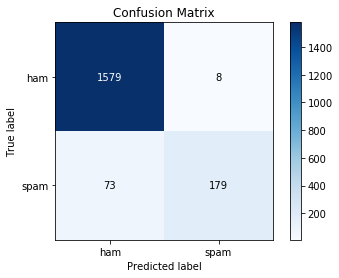

In [63]:
svm_fit()

['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']
acurracy_SVM 0.958673191952148
[[1579    8]
 [  68  184]]


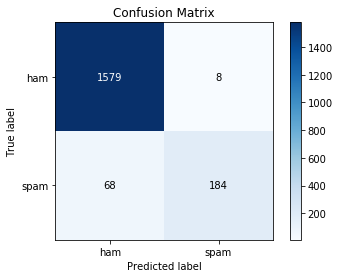

In [86]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(trainset, trainlabel)
predicted_values_svm = clf.predict(testset)
print(predicted_values_svm)
acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)
print("acurracy_SVM " + str(acurracy_SVM))
confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm,labels=["ham","spam"] )
print(confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=False)
plt.show()


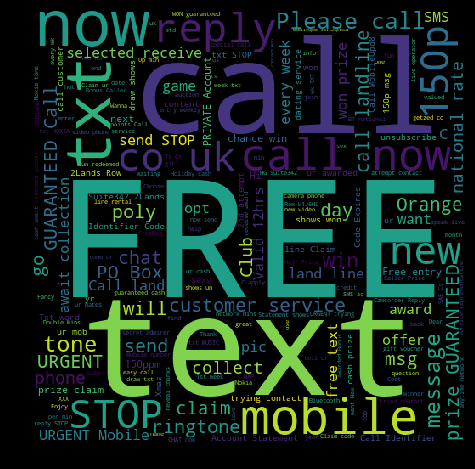

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(list(messages[messages['v1'] == 'spam']['v2']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10,8),facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

